In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('India_Crime_Analysis.csv')

In [3]:
df

Source.Name        STATE/UT  \
0      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
1      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
2      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
3      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
4      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
...                                                  ...             ...   
69650  42_District_wise_crimes_committed_against_wome...     LAKSHADWEEP   
69651  42_District_wise_crimes_committed_against_wome...     LAKSHADWEEP   
69652  42_District_wise_crimes_committed_against_wome...      PUDUCHERRY   
69653  42_District_wise_crimes_committed_against_wome...      PUDUCHERRY   
69654  42_District_wise_crimes_committed_against_wome...      PUDUCHERRY   

            DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0           ADILABAD  2001.0   101.0               60.0   
1          ANANTAPUR  2001.0   151.0              125.0   
2           CHITTOOR  2001.0   101.0               57.0   
3           CUDDAPAH  2001.0    80.0               53.0   
4      EAST GODAVARI  2001.0    82.0               67.0   
...              ...     ...     ...                ...   
69650    LAKSHADWEEP     NaN     NaN                NaN   
69651          TOTAL     NaN     NaN                NaN   
69652       KARAIKAL     NaN     NaN                NaN   
69653     PUDUCHERRY     NaN     NaN                NaN   
69654          TOTAL     NaN     NaN                NaN   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                           17.0  50.0             0.0   
1                                            1.0  23.0             0.0   
2                                            2.0  27.0             0.0   
3                                            1.0  20.0             0.0   
4                                            1.0  23.0             0.0   
...                                          ...   ...             ...   
69650                                        NaN   NaN             NaN   
69651                                        NaN   NaN             NaN   
69652                                        NaN   NaN             NaN   
69653                                        NaN   NaN             NaN   
69654                                        NaN   NaN             NaN   

       OTHER RAPE  ...  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0            50.0  ...   30.0              1131.0          16.0   
1            23.0  ...   69.0              1543.0           7.0   
2            27.0  ...   38.0              2088.0          14.0   
3            20.0  ...   23.0               795.0          17.0   
4            23.0  ...   41.0              1244.0          12.0   
...           ...  ...    ...                 ...           ...   
69650         NaN  ...    NaN                 NaN           NaN   
69651         NaN  ...    NaN                 NaN           NaN   
69652         NaN  ...    NaN                 NaN           NaN   
69653         NaN  ...    NaN                 NaN           NaN   
69654         NaN  ...    NaN                 NaN           NaN   

       ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                  149.0     
1                                                  118.0     
2                                                  112.0     
3                                                  126.0     
4                                                  109.0     
...                                                  ...     
69650                                                NaN     
69651                                                NaN     
69652                                                NaN     
69653                                                NaN     
69654                                          

In [4]:
df.isnull().sum()

Source.Name                                                0
STATE/UT                                                9270
DISTRICT                                               24570
YEAR                                                   55838
MURDER                                                 60638
ATTEMPT TO MURDER                                      60638
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              60638
RAPE                                                   60638
CUSTODIAL RAPE                                         60638
OTHER RAPE                                             60638
KIDNAPPING & ABDUCTION                                 60638
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            60638
KIDNAPPING AND ABDUCTION OF OTHERS                     60638
DACOITY                                                60638
PREPARATION AND ASSEMBLY FOR DACOITY                   60638
ROBBERY                                                60638
BURGLARY                

As we can see that the dataset has lots of missing values.  

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Source.Name                                            0
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                          

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Source.Name                                          9017 non-null   object 
 1   STATE/UT                                             9017 non-null   object 
 2   DISTRICT                                             9017 non-null   object 
 3   YEAR                                                 9017 non-null   float64
 4   MURDER                                               9017 non-null   float64
 5   ATTEMPT TO MURDER                                    9017 non-null   float64
 6   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 7   RAPE                                                 9017 non-null   float64
 8   CUSTODIAL RAPE                                       9017 non-null  

In [8]:
df.describe()

YEAR      MURDER  ATTEMPT TO MURDER  \
count  9017.000000  9017.00000        9017.000000   
mean   2006.629034    89.28535          78.069646   
std       3.463623   327.27503         303.446020   
min    2001.000000     0.00000           0.000000   
25%    2004.000000    18.00000          10.000000   
50%    2007.000000    38.00000          28.000000   
75%    2010.000000    66.00000          56.000000   
max    2012.000000  7601.00000        7964.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                9017.000000  9017.000000     9017.000000   
mean                                    9.895531    53.041366        0.005767   
std                                    59.521657   190.741450        0.115223   
min                                     0.000000     0.000000        0.000000   
25%                                     0.000000     8.000000        0.000000   
50%                                     2.000000    20.000000        0.000000   
75%                                     6.000000    41.000000        0.000000   
max                                  1616.000000  3425.000000        5.000000   

        OTHER RAPE  KIDNAPPING & ABDUCTION  \
count  9017.000000             9017.000000   
mean     53.035599               79.152046   
std     190.725474              317.630964   
min       0.000000                0.000000   
25%       8.000000               10.000000   
50%      20.000000               25.000000   
75%      41.000000               56.000000   
max    3425.000000             8878.000000   

       KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
count                                  9017.000000   
mean                                     58.535433   
std                                     246.937464   
min                                       0.000000   
25%                                       6.000000   
50%                                      18.000000   
75%                                      42.000000   
max                                    7910.000000   

       KIDNAPPING AND ABDUCTION OF OTHERS  ...        ARSON  \
count                         9017.000000  ...  9017.000000   
mean                            20.616613  ...    25.219918   
std                             88.586415  ...    98.880282   
min                              0.000000  ...     0.000000   
25%                              1.000000  ...     2.000000   
50%                              5.000000  ...     8.000000   
75%                             13.000000  ...    20.000000   
max                           2416.000000  ...  2830.000000   

       HURT/GREVIOUS HURT  DOWRY DEATHS  \
count         9017.000000   9017.000000   
mean           747.893091     20.228901   
std           3024.106467     96.970466   
min              0.000000      0.000000   
25%             43.000000      1.000000   
50%            199.000000      5.000000   
75%            529.000000     16.000000   
max          56768.000000   2322.000000   

       ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
count                                        9017.000000     
mean                                          100.511257     
std                                           394.059436     
min                                             0.000000     
25%                                            10.000000     
50%                                            31.000000     
75%                                            76.000000     
max                                          7118.000000     

       INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
count                 9017.000000                          9017.000000   
mean                    27.515582                           194.122435   
std                    167.237522                           831.986594   
min                      0.000000                             0.000000   
25%                

This provides use the statistical measures like Mean, standard deviation, count, min max values and the percenntile. Here the count is 9017 which is the value in each column is 9017 and other values for each column.

Univariate Analysis

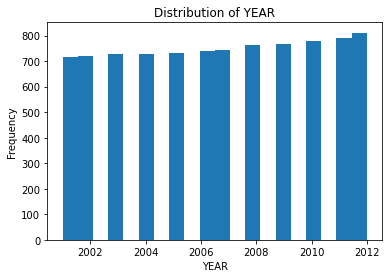

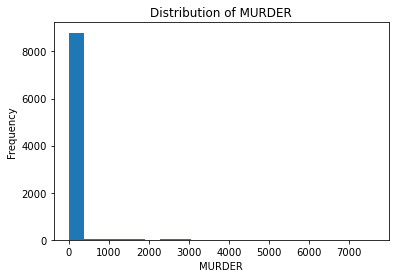

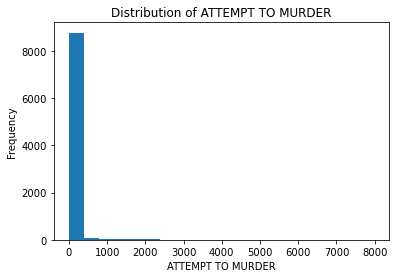

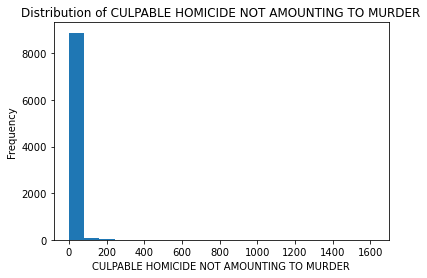

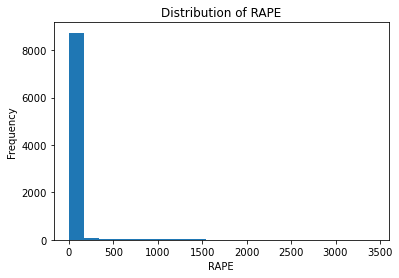

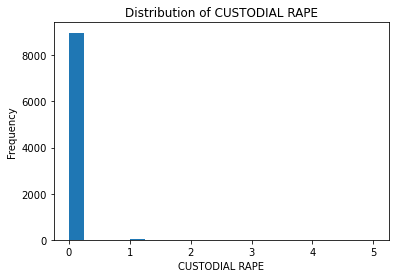

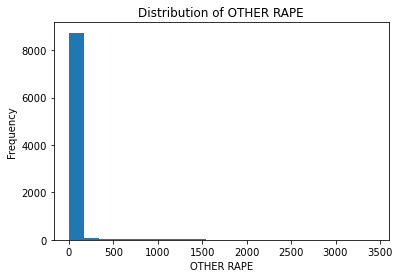

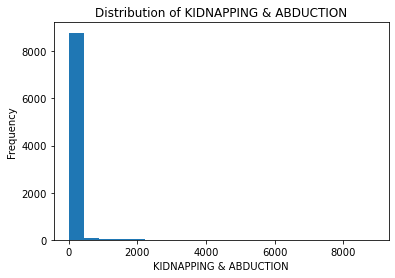

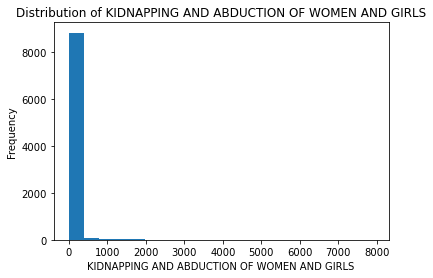

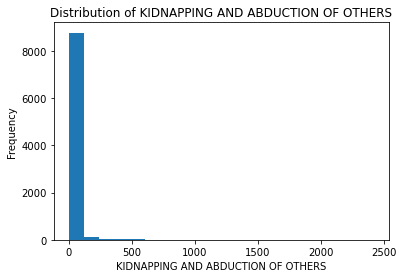

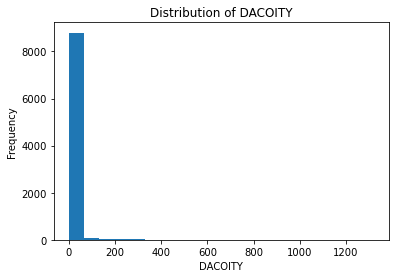

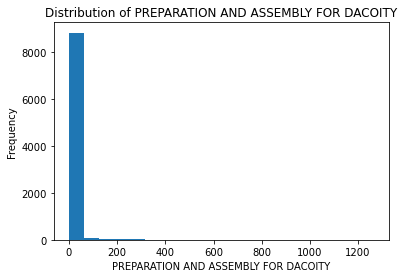

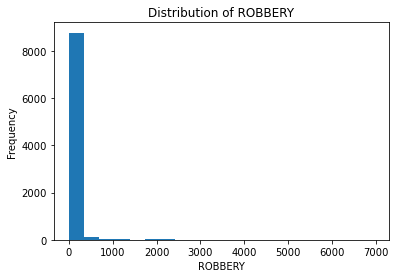

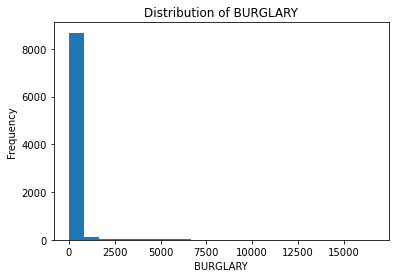

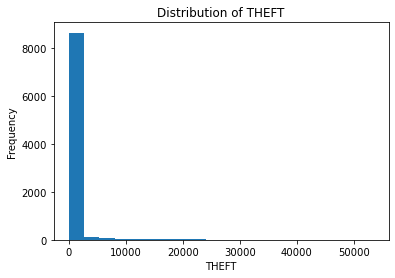

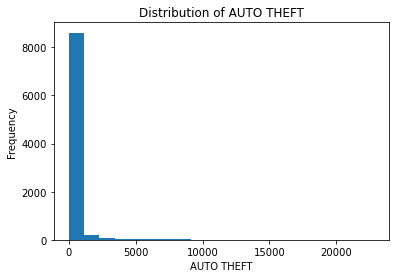

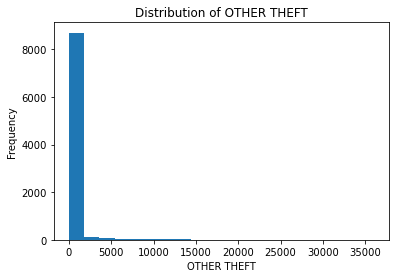

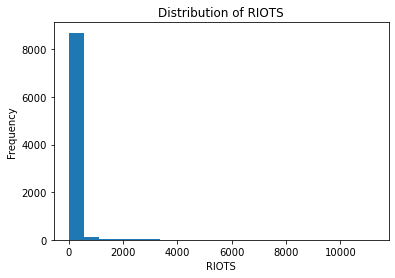

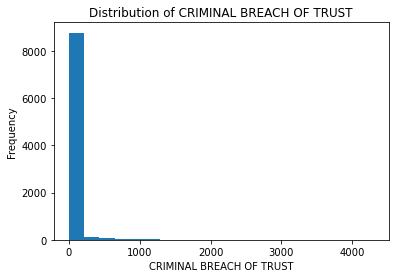

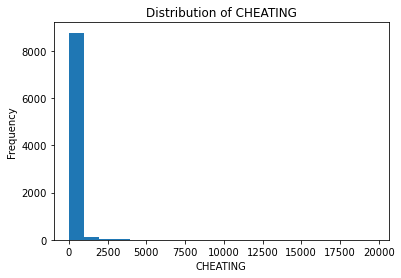

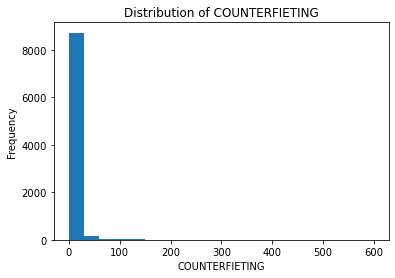

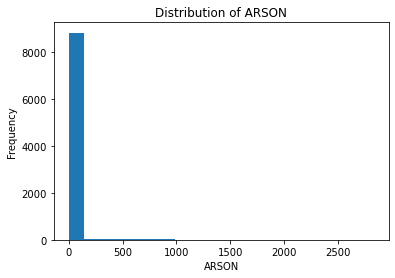

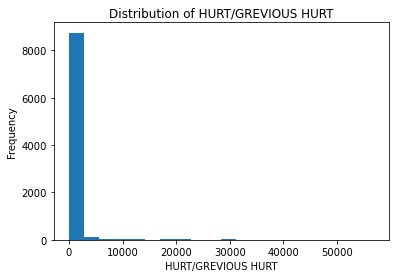

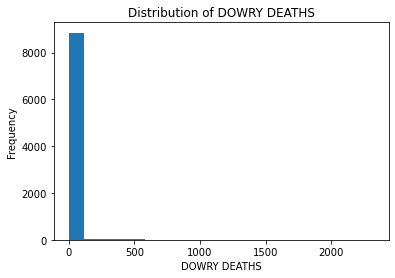

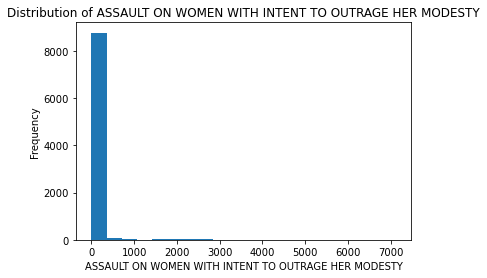

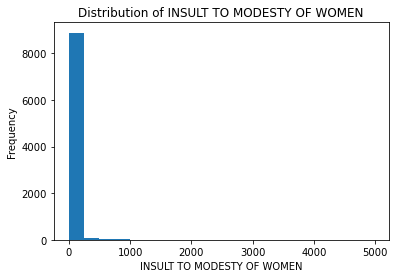

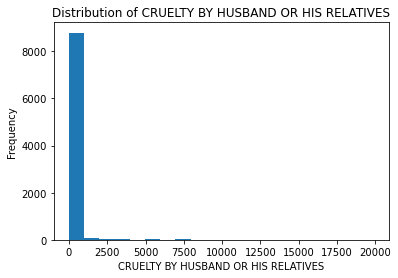

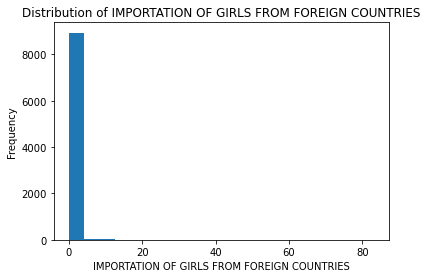

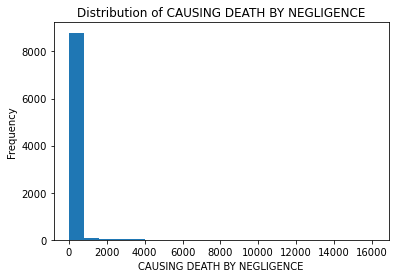

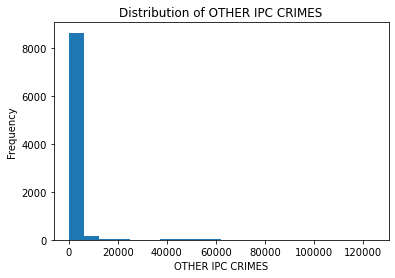

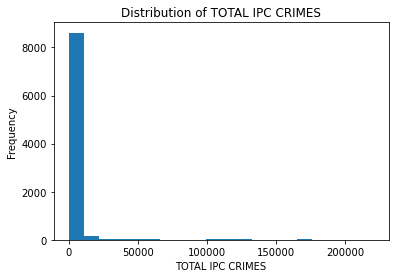

In [9]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

Bivariate analysis

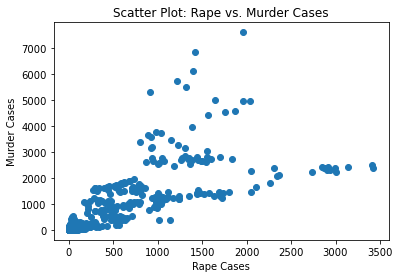

In [10]:
plt.scatter(df['RAPE'], df['MURDER'])
plt.xlabel('Rape Cases')
plt.ylabel('Murder Cases')
plt.title('Scatter Plot: Rape vs. Murder Cases')
plt.show()

Checking the Murder and Rape cases Separately 

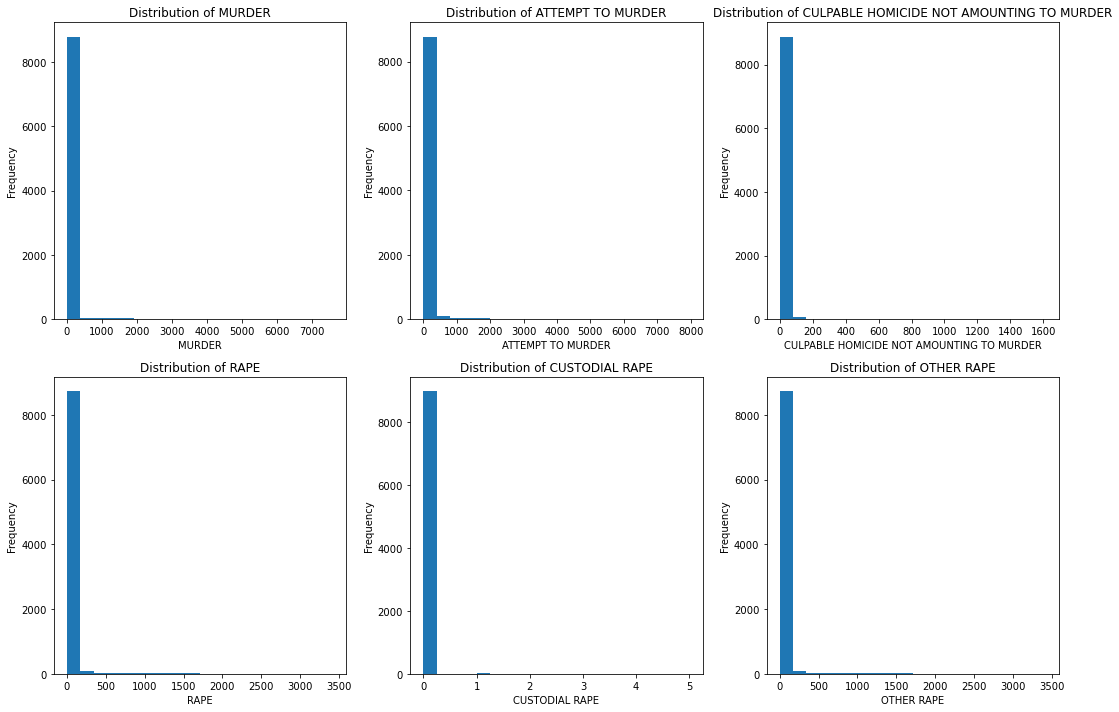

In [11]:
murder_columns = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']
rape_columns = ['RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(murder_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col].dropna(), bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

for i, col in enumerate(rape_columns):
    plt.subplot(2, 3, i + 4)
    plt.hist(df[col].dropna(), bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

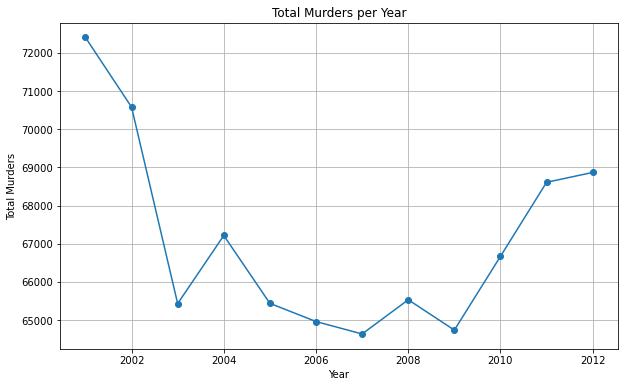

In [12]:
murders_per_year = df.groupby('YEAR')['MURDER'].sum()

plt.figure(figsize=(10, 6))
murders_per_year.plot(kind='line', marker='o')
plt.title('Total Murders per Year')
plt.xlabel('Year')
plt.ylabel('Total Murders')
plt.grid(True)
plt.show()

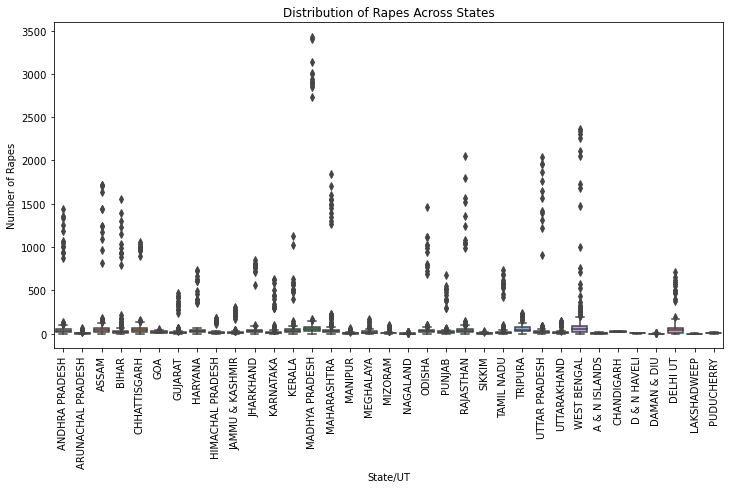

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE/UT', y='RAPE', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Rapes Across States')
plt.xlabel('State/UT')
plt.ylabel('Number of Rapes')
plt.show()

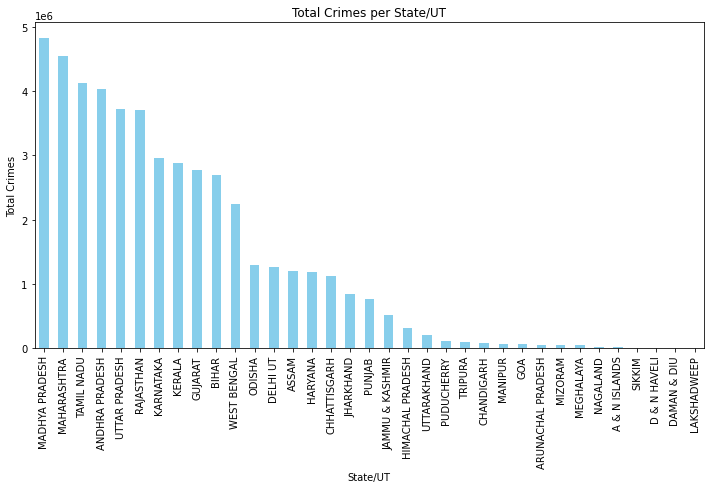

In [14]:
total_crimes_per_state = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
total_crimes_per_state.plot(kind='bar', color='skyblue')
plt.title('Total Crimes per State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)
plt.show()

Multivariate Analysis

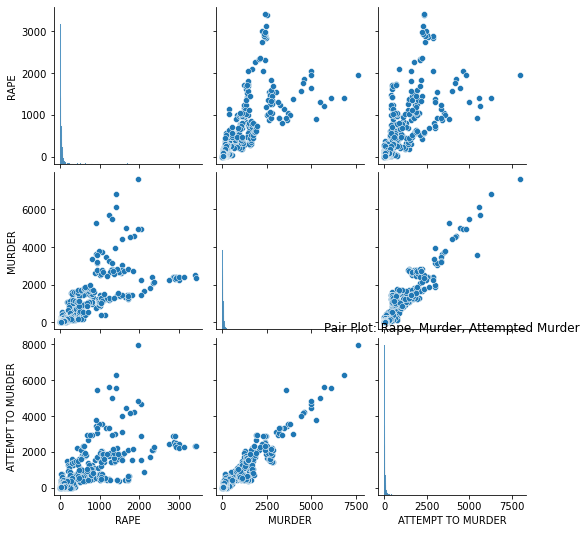

In [15]:
sns.pairplot(df[['RAPE', 'MURDER', 'ATTEMPT TO MURDER']])
plt.title('Pair Plot: Rape, Murder, Attempted Murder')
plt.show()

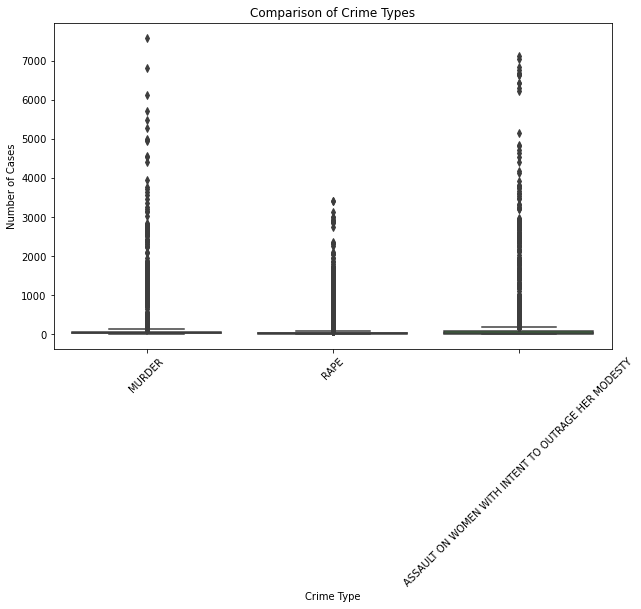

In [16]:
crime_types = ['MURDER', 'RAPE', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[crime_types])
plt.title('Comparison of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

plt.scatter(df['Literacy Rate'], dataset['Total Crimes'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.title('Literacy Rate vs Total Crimes')
plt.show()

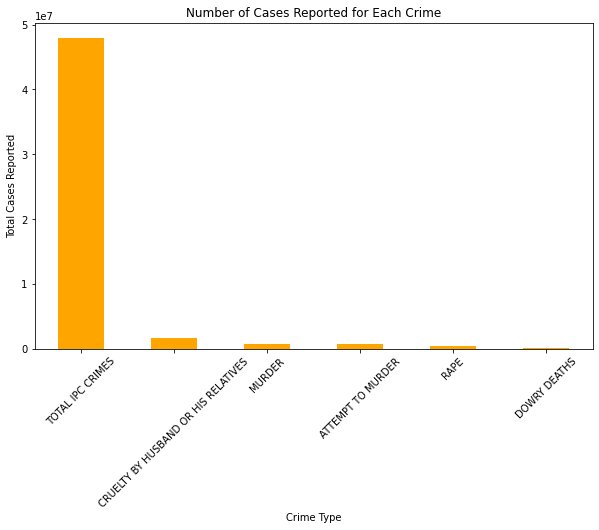

The crime with the highest reported cases is: TOTAL IPC CRIMES with 47881308.0 cases.


In [17]:
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'RAPE', 'DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'TOTAL IPC CRIMES']

total_cases = df[crime_types].sum()

plt.figure(figsize=(10, 6))
total_cases.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Number of Cases Reported for Each Crime')
plt.xlabel('Crime Type')
plt.ylabel('Total Cases Reported')
plt.xticks(rotation=45)
plt.show()
highest_crime = total_cases.idxmax()
print(f"The crime with the highest reported cases is: {highest_crime} with {total_cases[highest_crime]} cases.")

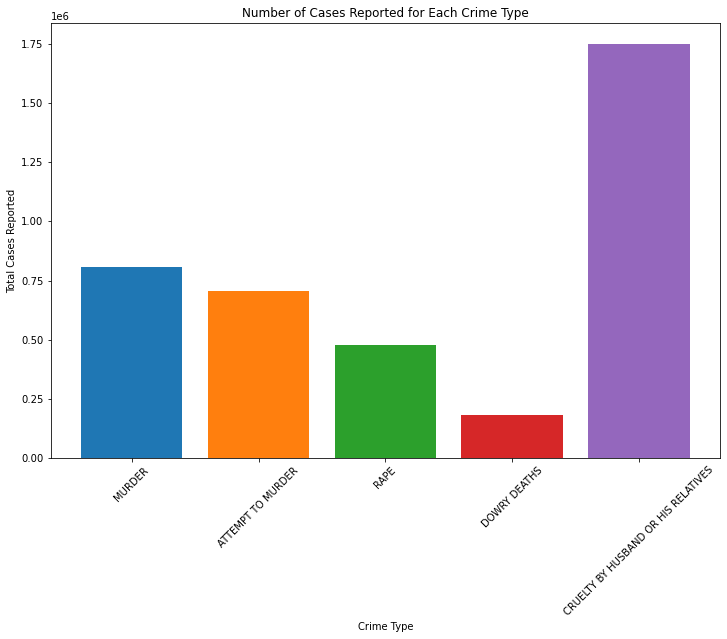

In [18]:
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'RAPE', 'DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES']

plt.figure(figsize=(12, 8))
for crime in crime_types:
    total_cases = df[crime].sum()
    plt.bar(crime, total_cases)

plt.title('Number of Cases Reported for Each Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Total Cases Reported')
plt.xticks(rotation=45)
plt.show()

We can see from this, the highest number of cases reported for a specific crime. 

In [19]:
print(df.columns)

Index(['Source.Name', 'STATE/UT', 'DISTRICT', 'YEAR', 'MURDER',
       'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


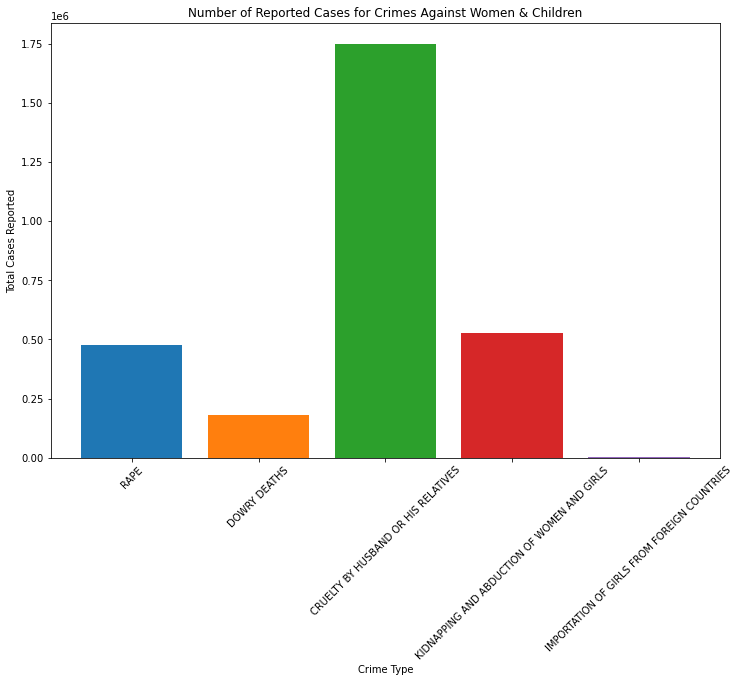

In [20]:
women_children_crimes = [
    'RAPE', 'DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
    'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'
]

# Create individual bar plots for each crime type
plt.figure(figsize=(12, 8))
for crime in women_children_crimes:
    total_cases = df[crime].sum()
    plt.bar(crime, total_cases)

plt.title('Number of Reported Cases for Crimes Against Women & Children')
plt.xlabel('Crime Type')
plt.ylabel('Total Cases Reported')
plt.xticks(rotation=45)
plt.show()

In [21]:
import plotly.express as px
total_crimes_per_state = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()

fig = px.bar(total_crimes_per_state, x='STATE/UT', y='TOTAL IPC CRIMES',
             labels={'TOTAL IPC CRIMES': 'Total Reported Crimes', 'STATE/UT': 'State'},
             title='Total Reported Crimes per State')
fig.update_xaxes(title_text='State/UT')
fig.update_yaxes(title_text='Total Reported Crimes')

fig.show()

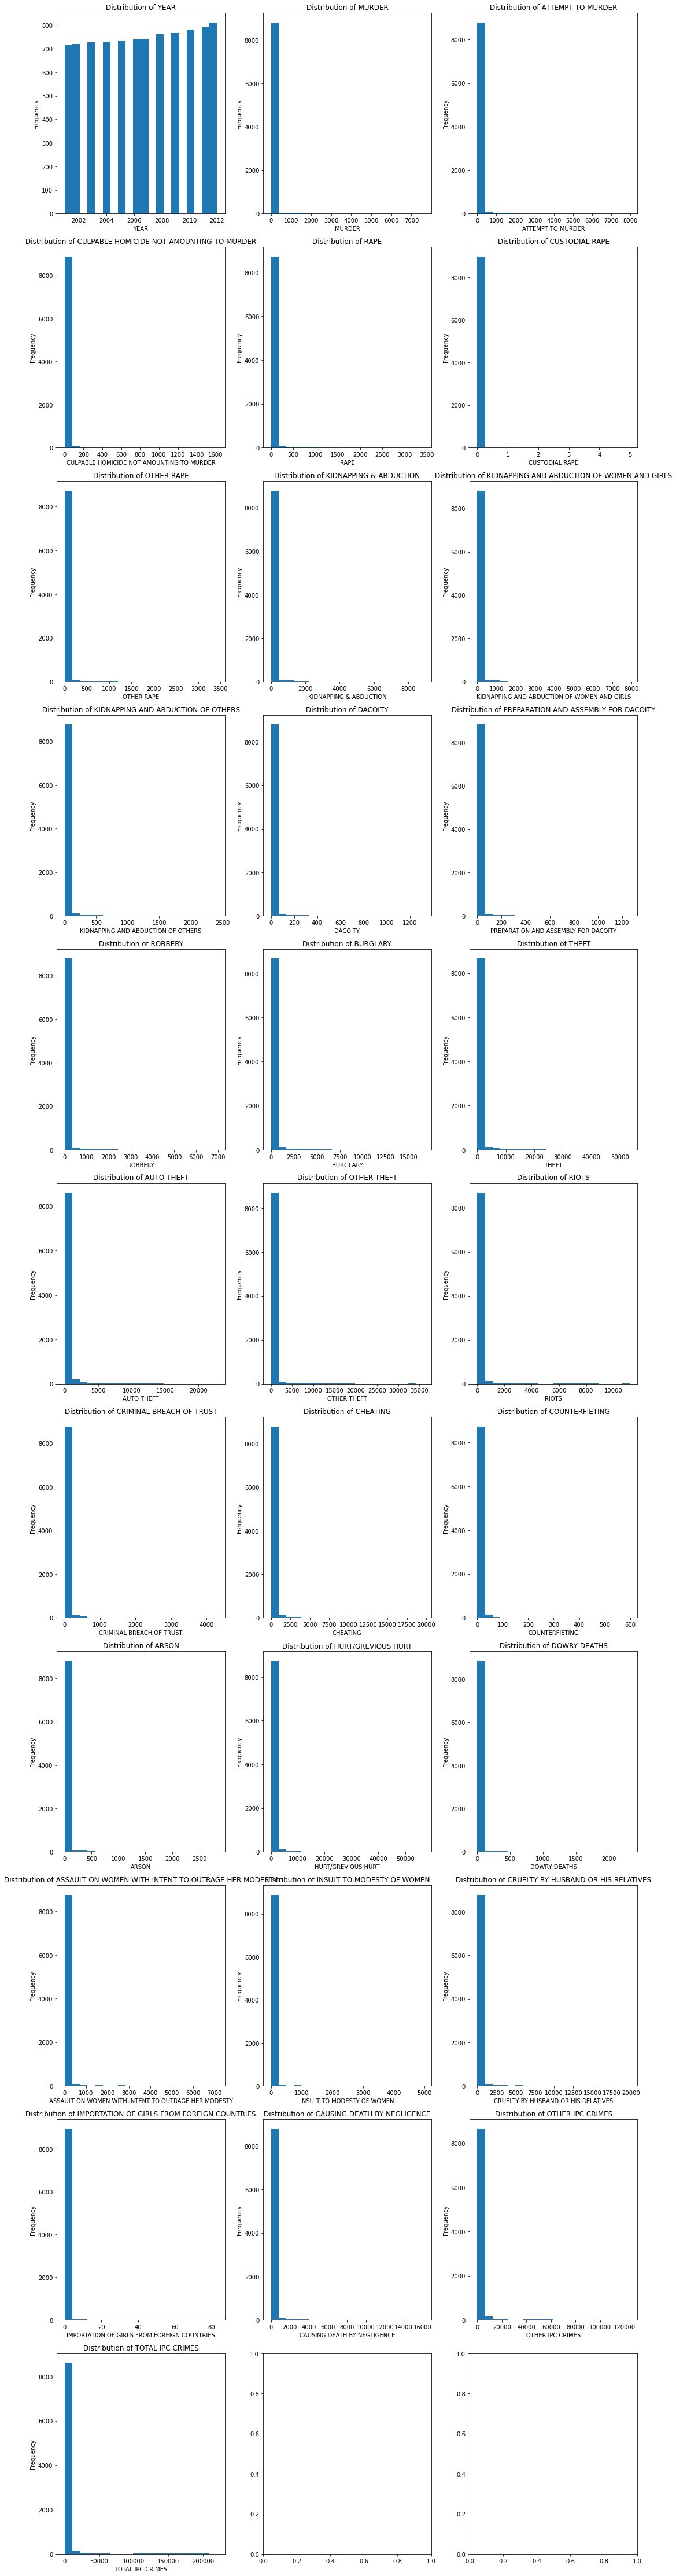

In [22]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()

columns_per_row = 3
total_columns = len(numerical_columns)

fig, axes = plt.subplots(nrows=total_columns // columns_per_row + 1, ncols=columns_per_row,
                         figsize=(15, total_columns * 2))

for i, col in enumerate(numerical_columns):
    row = i // columns_per_row
    col_num = i % columns_per_row
    if i < total_columns:
        plt.subplot(total_columns // columns_per_row + 1, columns_per_row, i + 1)
        plt.hist(df[col].dropna(), bins=20)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
    else:
        fig.delaxes(axes[row, col_num])

plt.tight_layout()
plt.show()

In [23]:
total_crimes_by_state = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)
safest_states = total_crimes_by_state.tail(5) 
dangerous_states = total_crimes_by_state.head(5) 

print("Safest States:")
print(safest_states)

print("\nMost Dangerous States:")
print(dangerous_states)

Safest States:
STATE/UT
A & N ISLANDS    18204.0
SIKKIM           14000.0
D & N HAVELI      9302.0
DAMAN & DIU       5896.0
LAKSHADWEEP       1486.0
Name: TOTAL IPC CRIMES, dtype: float64

Most Dangerous States:
STATE/UT
MADHYA PRADESH    4827540.0
MAHARASHTRA       4546872.0
TAMIL NADU        4120352.0
ANDHRA PRADESH    4037962.0
UTTAR PRADESH     3716148.0
Name: TOTAL IPC CRIMES, dtype: float64


As we can see the as per the dataset the most Safest and the dangerous places in india

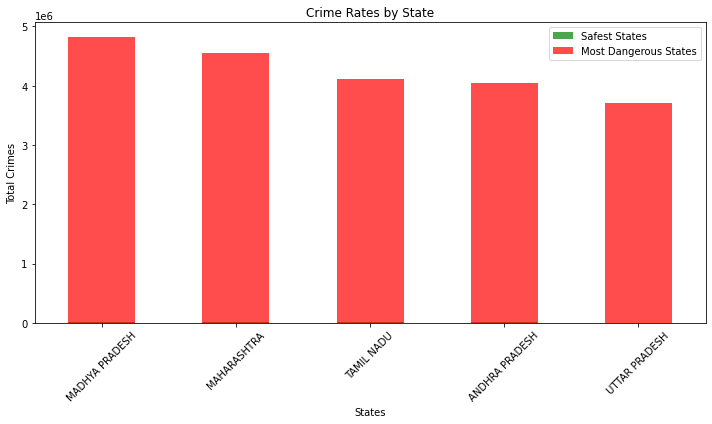

In [24]:
plt.figure(figsize=(10, 6))
safest_states.plot(kind='bar', color='green', alpha=0.7, label='Safest States')
dangerous_states.plot(kind='bar', color='red', alpha=0.7, label='Most Dangerous States')

plt.title('Crime Rates by State')
plt.xlabel('States')
plt.ylabel('Total Crimes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

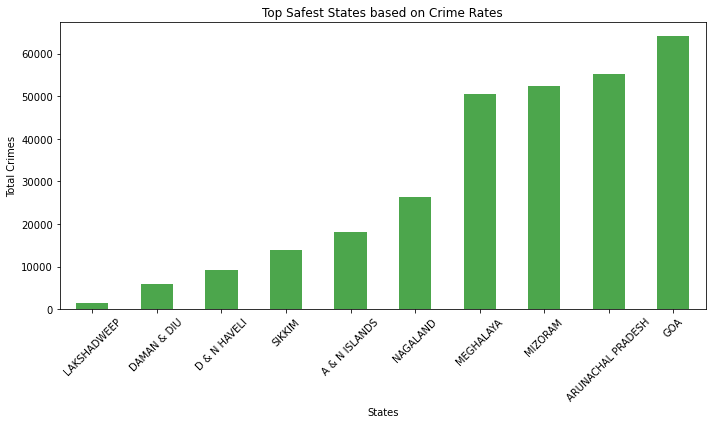

In [25]:
total_crimes_by_state = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=True)

safest_states = total_crimes_by_state.head(10)

plt.figure(figsize=(10, 6))
safest_states.plot(kind='bar', color='green', alpha=0.7)

plt.title('Top Safest States based on Crime Rates')
plt.xlabel('States')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.cluster import KMeans

numerical_columns = df.select_dtypes(include='number').columns.tolist()

num_clusters = 3

cluster_labels = {}

for col in numerical_columns:

    data = df[[col]].dropna()

   
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)
    

    cluster_labels[col] = kmeans.labels_


for col, labels in cluster_labels.items():
    df[f'{col}_Cluster'] = labels


print(df.head())

                                         Source.Name        STATE/UT  \
0  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
1  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
2  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
3  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
4  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   

        DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0       ADILABAD  2001.0   101.0               60.0   
1      ANANTAPUR  2001.0   151.0              125.0   
2       CHITTOOR  2001.0   101.0               57.0   
3       CUDDAPAH  2001.0    80.0               53.0   
4  EAST GODAVARI  2001.0    82.0               67.0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                       17.0  50.0             0.0   
1                                        1.0  23.0             0.0   
2                         

In [27]:
cluster_columns = [col for col in df.columns if col.endswith('_Cluster')]

cluster_dataframes = {}

for col in cluster_columns:
    unique_clusters = df[col].unique() 
    

    for cluster_label in unique_clusters:
        cluster_name = f"{col.split('_')[0]}_{cluster_label}"
        cluster_data = df[df[col] == cluster_label]
        
    
        cluster_dataframes[cluster_name] = cluster_data

for cluster_label, df in cluster_dataframes.items():
    print(f"\nDataFrame for {cluster_label}:")
    print(df.head())


DataFrame for YEAR_0:
                                         Source.Name        STATE/UT  \
0  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
1  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
2  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
3  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
4  01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   

        DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0       ADILABAD  2001.0   101.0               60.0   
1      ANANTAPUR  2001.0   151.0              125.0   
2       CHITTOOR  2001.0   101.0               57.0   
3       CUDDAPAH  2001.0    80.0               53.0   
4  EAST GODAVARI  2001.0    82.0               67.0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                       17.0  50.0             0.0   
1                                        1.0  23.0             0.0   
2  

Cluster Characteristics:

In [28]:
for cluster_label, cluster_df in cluster_dataframes.items():
    print(f"\nCharacteristics for {cluster_label}:")
    print(f"Total entries: {len(cluster_df)}")
    
    numeric_columns = cluster_df.select_dtypes(include=['float64', 'int64']).columns
    cluster_stats = cluster_df[numeric_columns].describe()
    
    print(f"\nStatistics for {cluster_label}:")
    print(cluster_stats)


Characteristics for YEAR_0:
Total entries: 2892

Statistics for YEAR_0:
              YEAR       MURDER  ATTEMPT TO MURDER  \
count  2892.000000  2892.000000        2892.000000   
mean   2002.508299    95.308437          80.038036   
std       1.117887   356.961782         323.416811   
min    2001.000000     0.000000           0.000000   
25%    2002.000000    20.000000          11.000000   
50%    2003.000000    40.000000          28.000000   
75%    2004.000000    70.000000          58.000000   
max    2004.000000  7601.000000        7964.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                2892.000000  2892.000000     2892.000000   
mean                                   10.342324    46.008299        0.004149   
std                                    58.224167   165.764182        0.064293   
min                                     0.000000     0.000000        0.000000   
25%                                

Cluster Comparison:

In [29]:
print(cluster_dataframes.keys())

dict_keys(['YEAR_0', 'YEAR_2', 'YEAR_1', 'MURDER_0', 'MURDER_2', 'MURDER_1', 'ATTEMPT TO MURDER_1', 'ATTEMPT TO MURDER_0', 'ATTEMPT TO MURDER_2', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_0', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_2', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_1', 'RAPE_0', 'RAPE_1', 'RAPE_2', 'CUSTODIAL RAPE_0', 'CUSTODIAL RAPE_2', 'CUSTODIAL RAPE_1', 'OTHER RAPE_0', 'OTHER RAPE_1', 'OTHER RAPE_2', 'KIDNAPPING & ABDUCTION_1', 'KIDNAPPING & ABDUCTION_0', 'KIDNAPPING & ABDUCTION_2', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS_0', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS_1', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS_2', 'KIDNAPPING AND ABDUCTION OF OTHERS_0', 'KIDNAPPING AND ABDUCTION OF OTHERS_2', 'KIDNAPPING AND ABDUCTION OF OTHERS_1', 'DACOITY_0', 'DACOITY_1', 'DACOITY_2', 'PREPARATION AND ASSEMBLY FOR DACOITY_0', 'PREPARATION AND ASSEMBLY FOR DACOITY_2', 'PREPARATION AND ASSEMBLY FOR DACOITY_1', 'ROBBERY_0', 'ROBBERY_2', 'ROBBERY_1', 'BURGLARY_0', 'BURGL

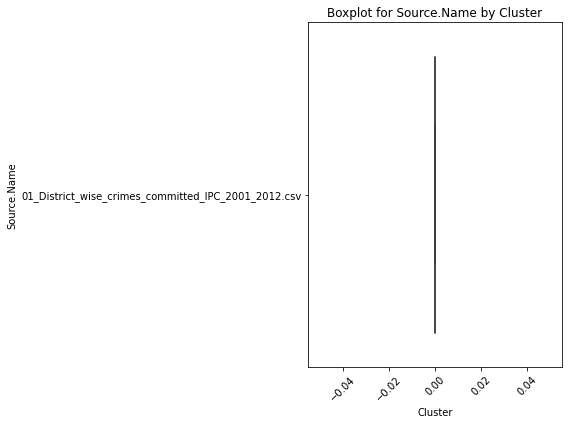

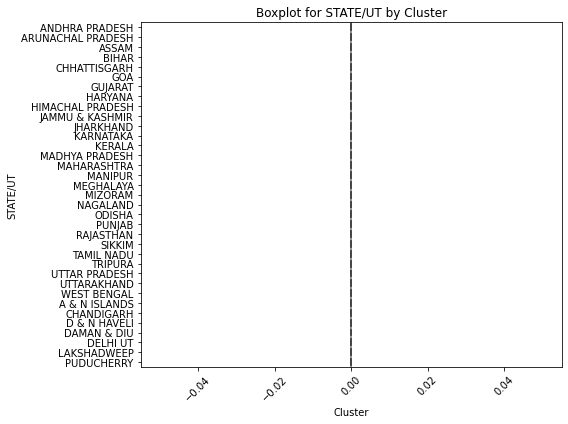

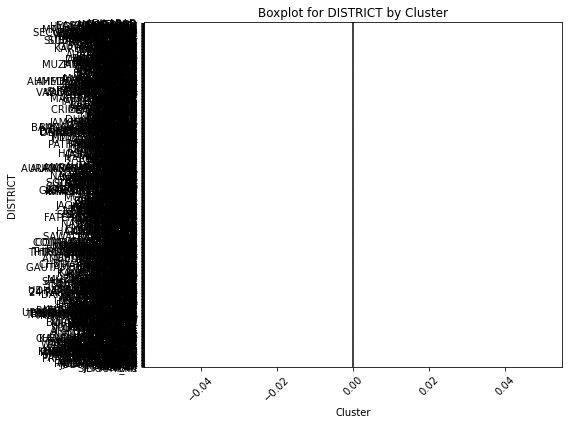

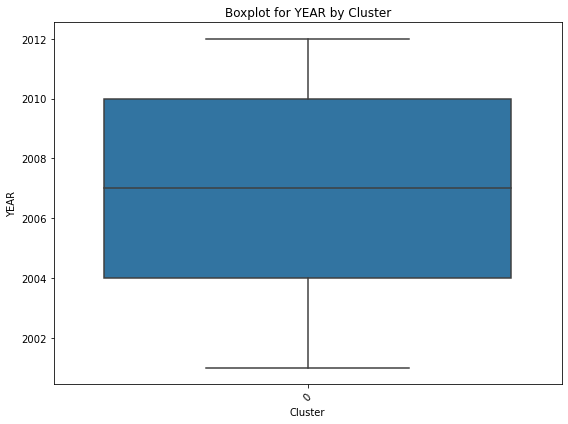

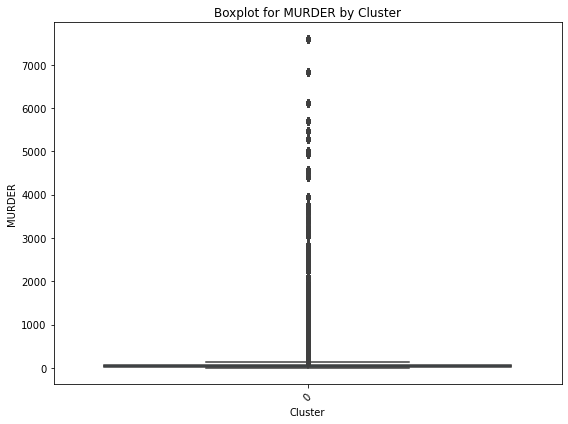

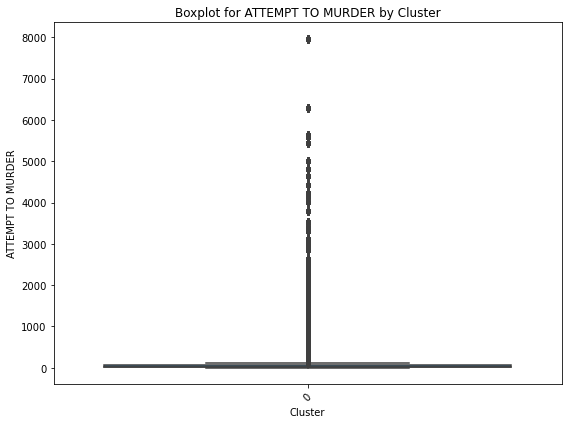

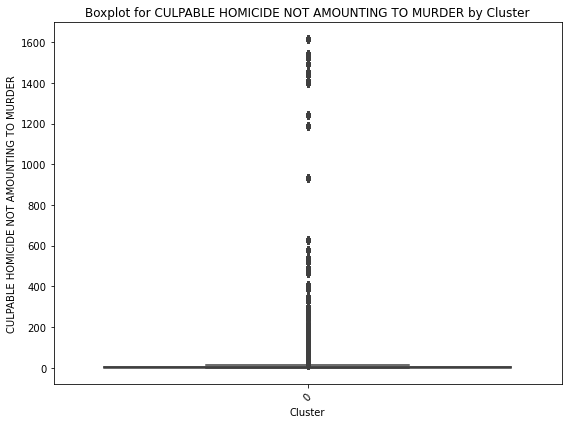

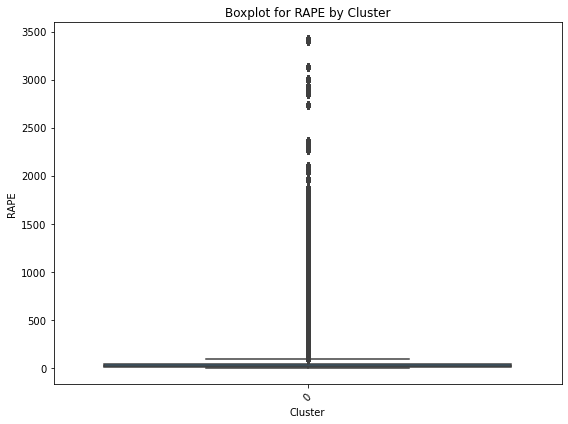

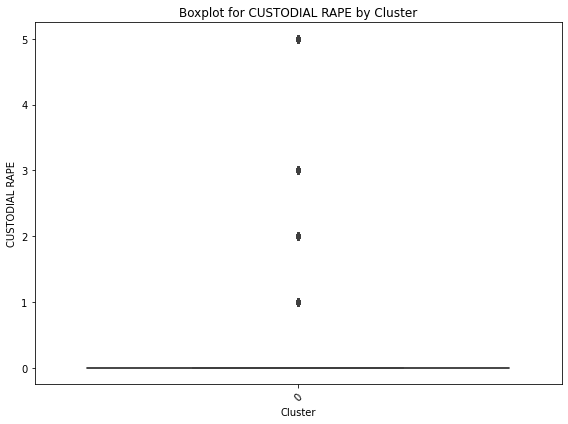

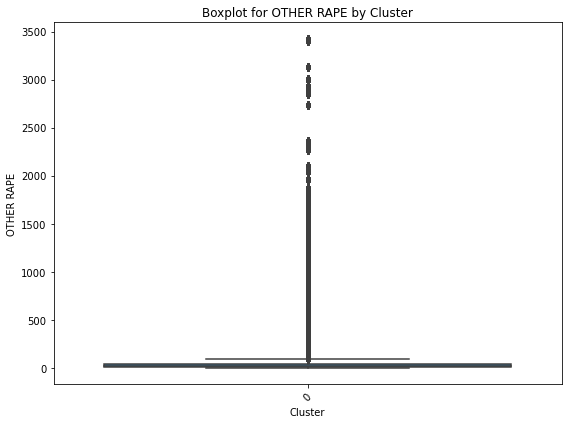

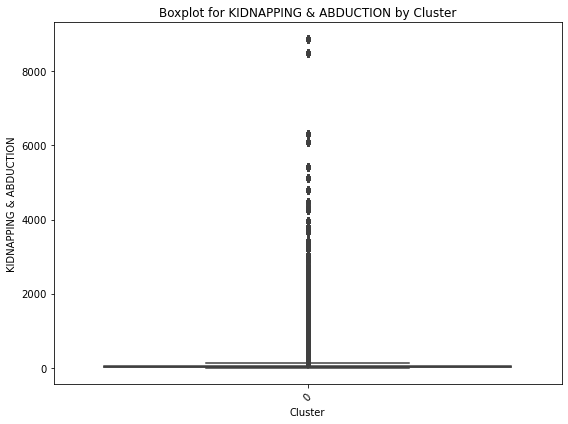

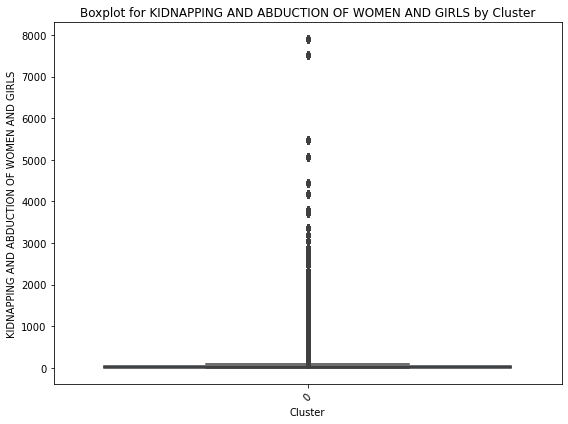

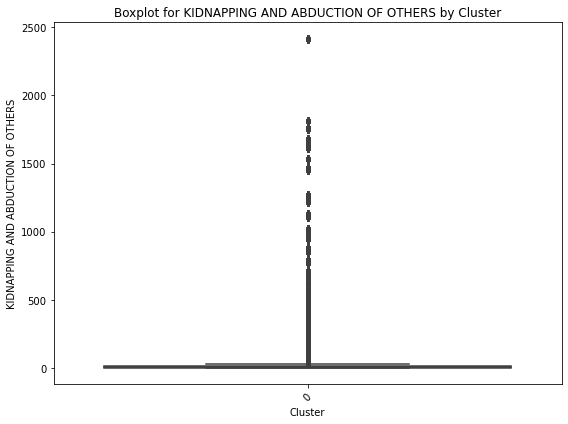

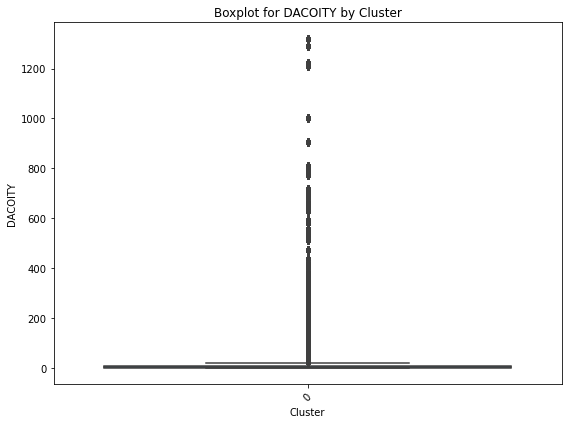

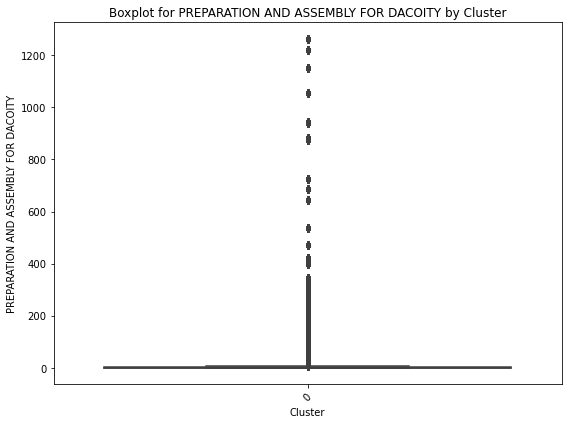

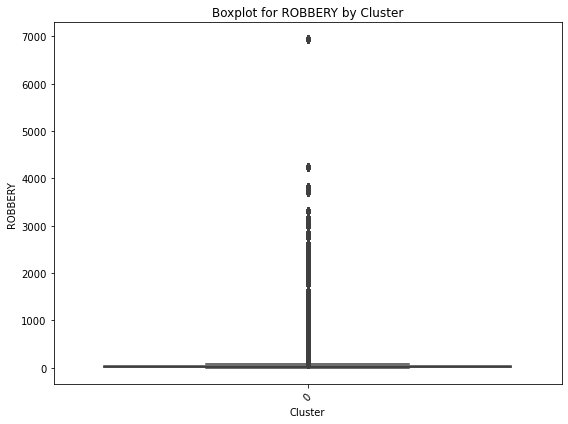

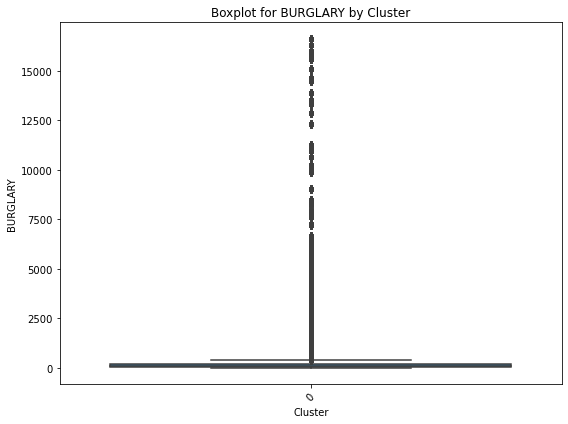

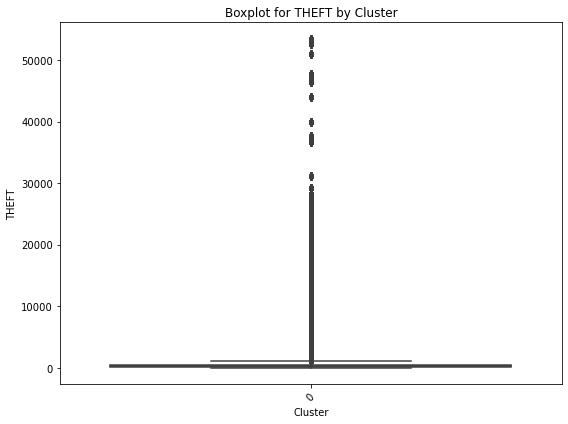

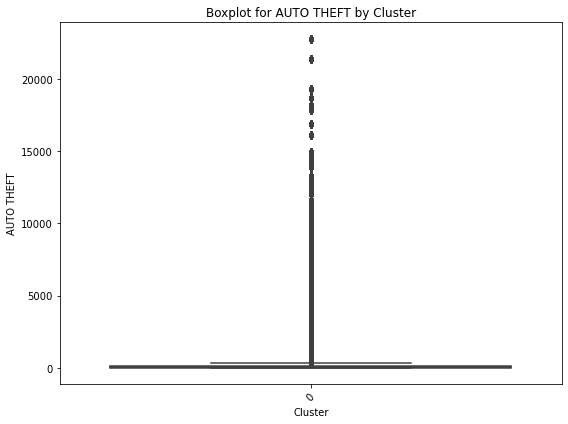

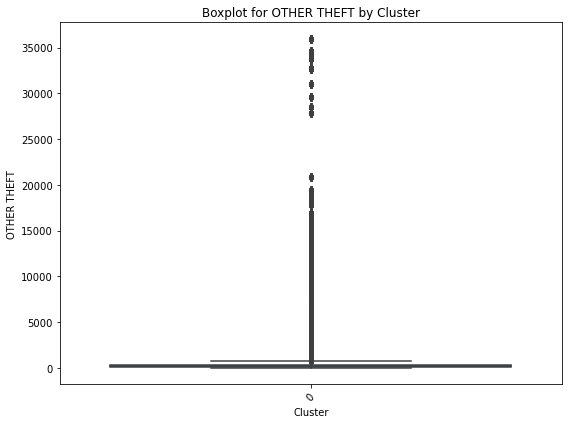

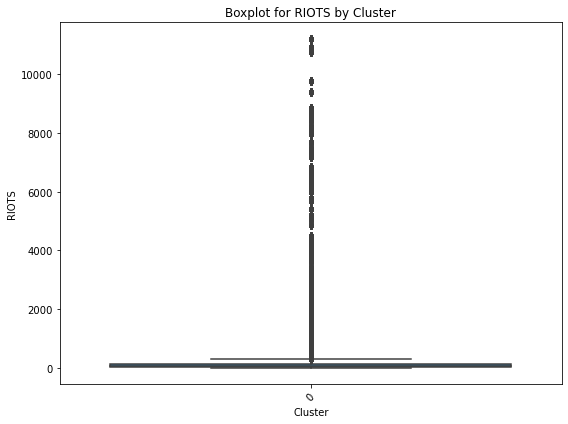

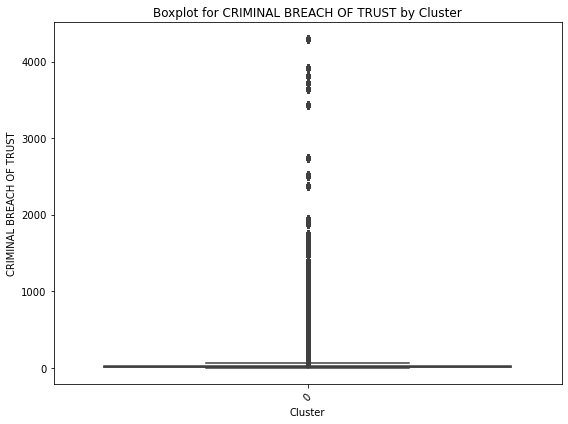

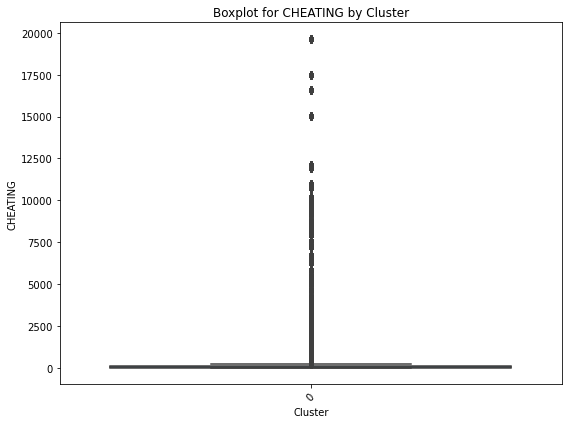

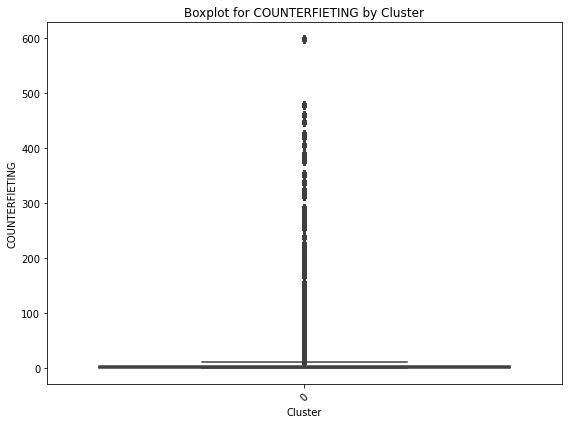

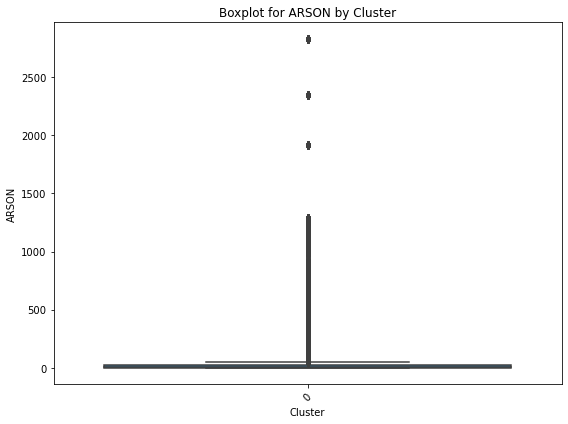

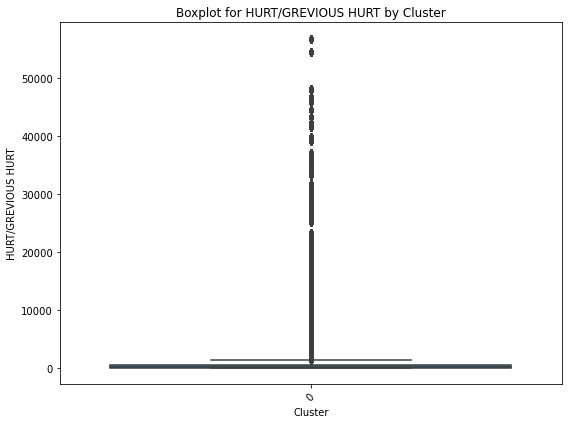

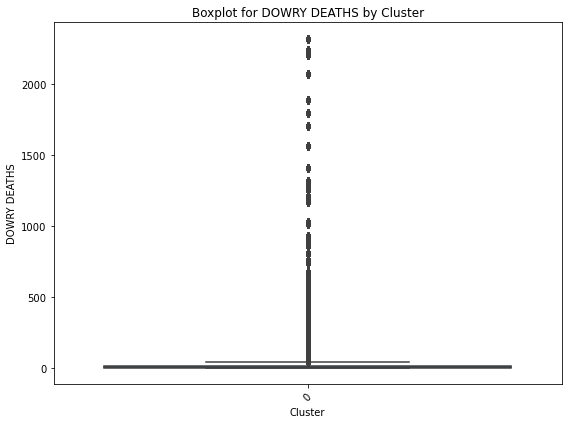

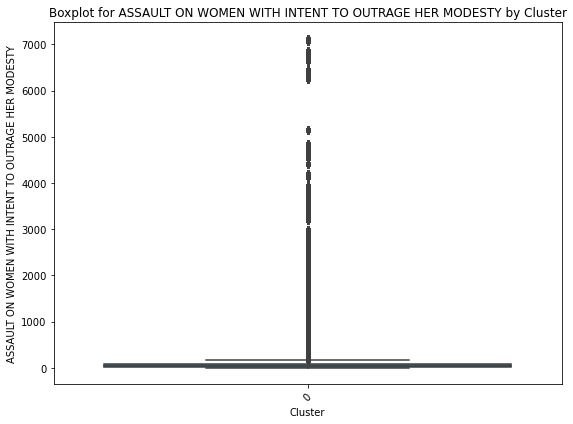

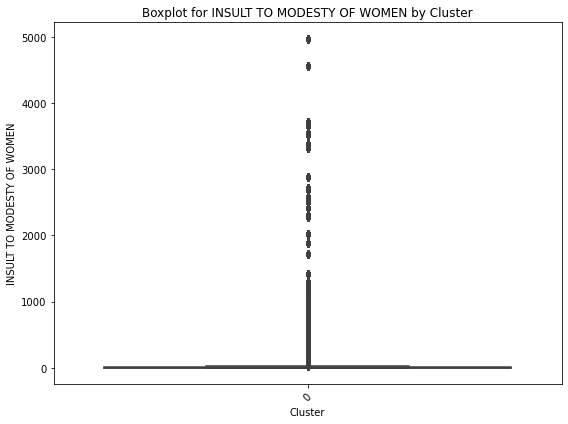

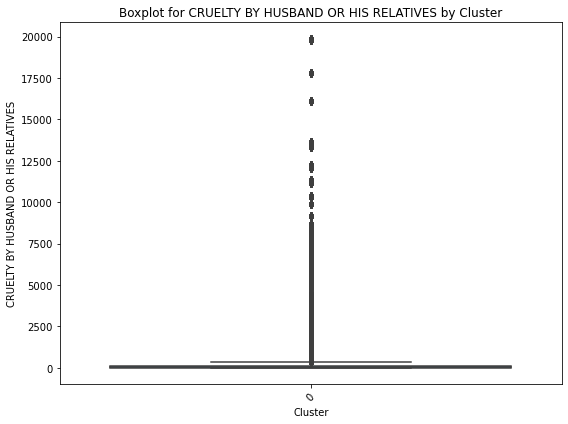

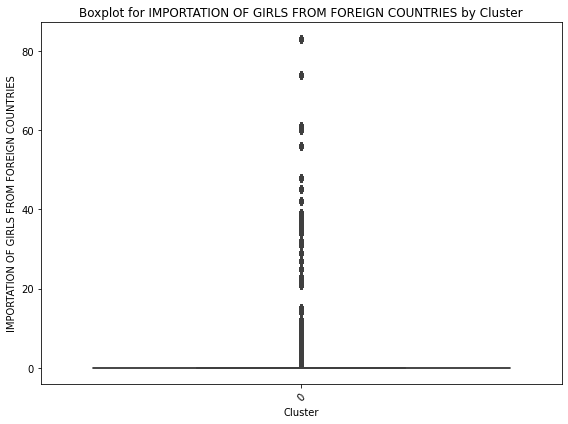

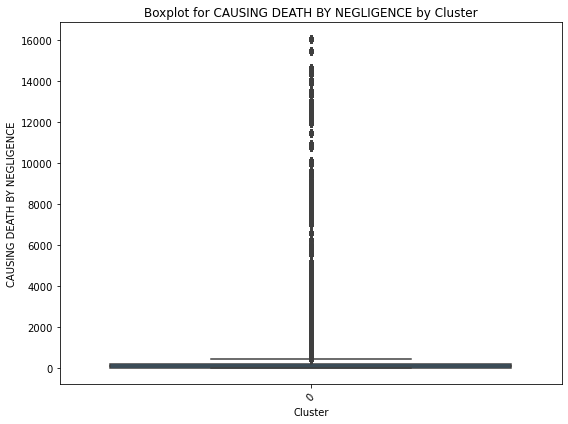

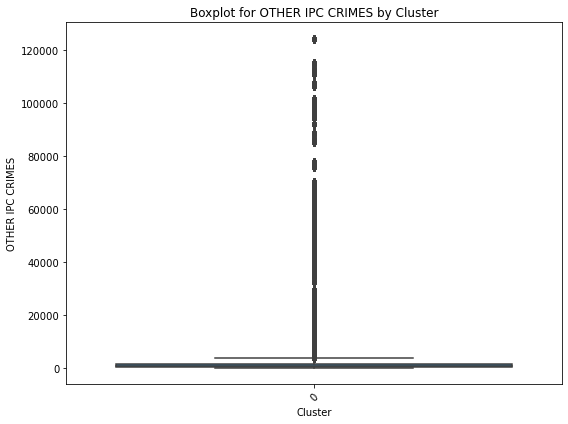

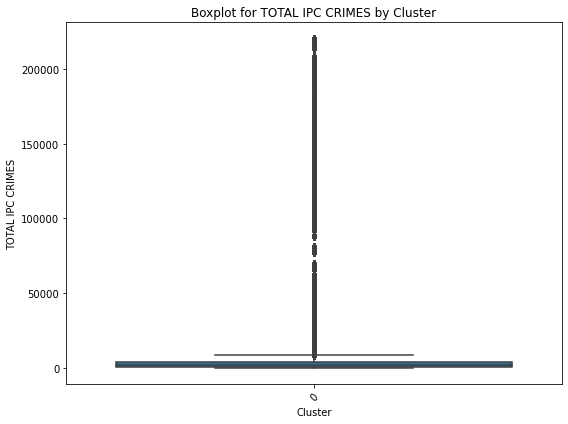

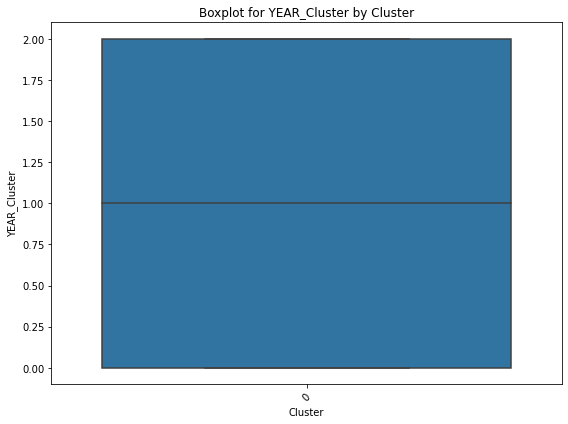

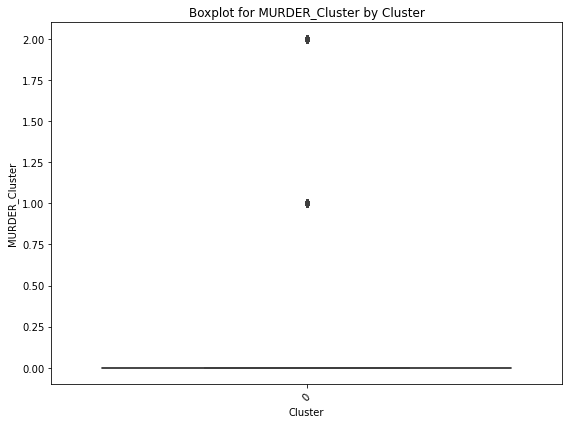

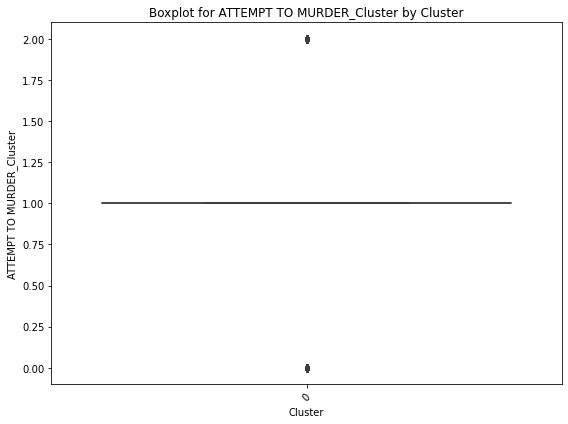

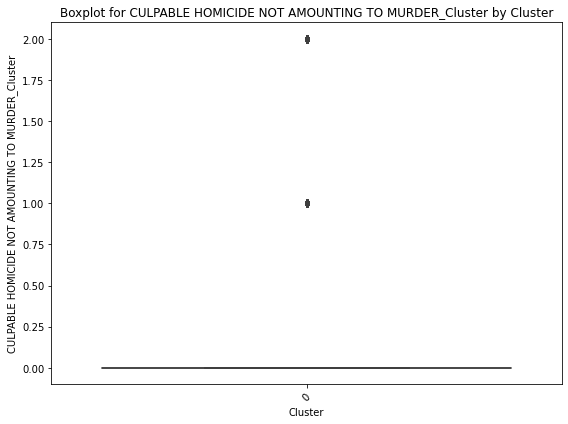

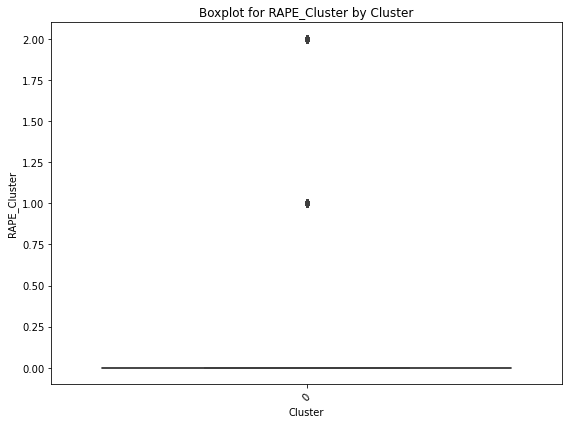

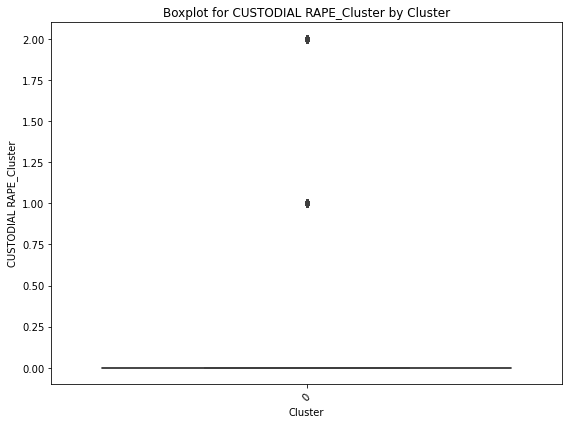

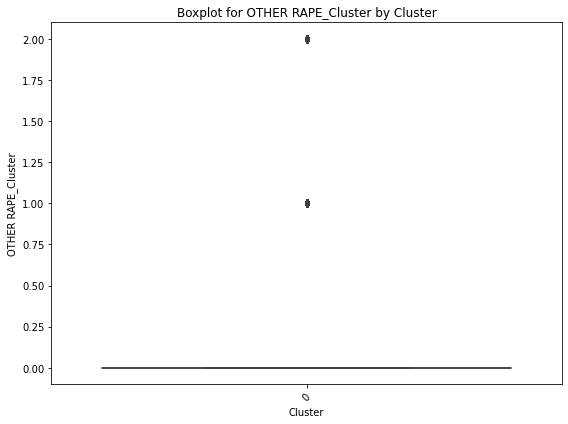

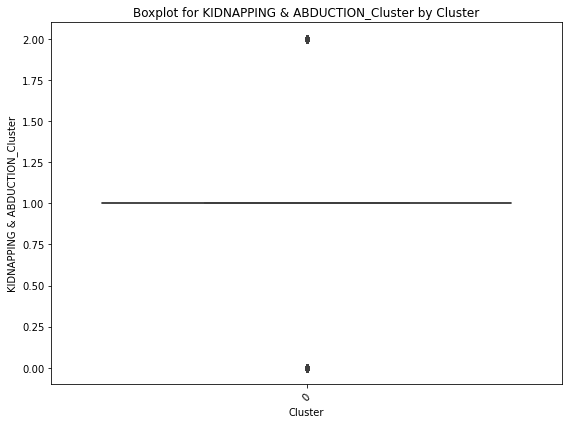

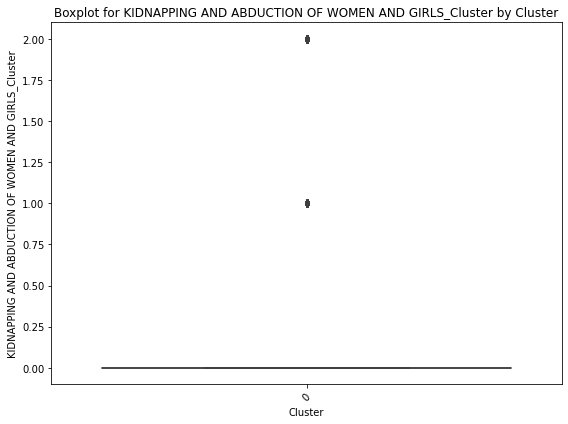

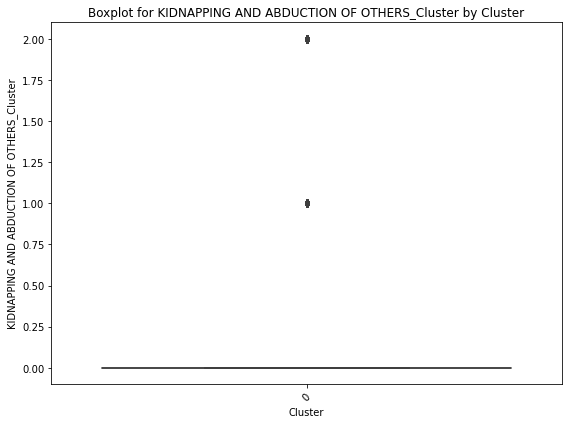

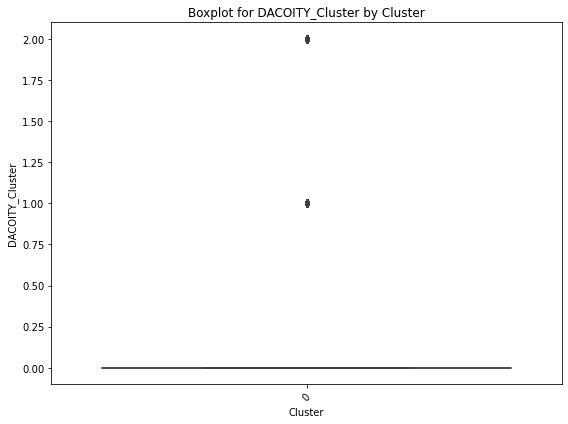

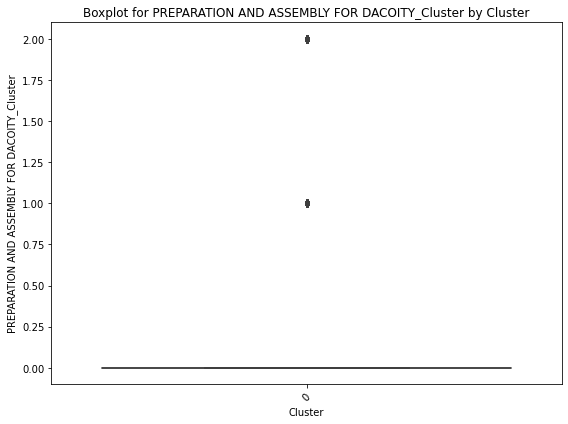

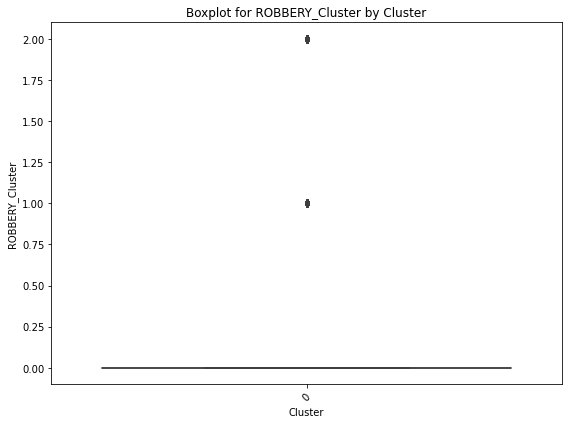

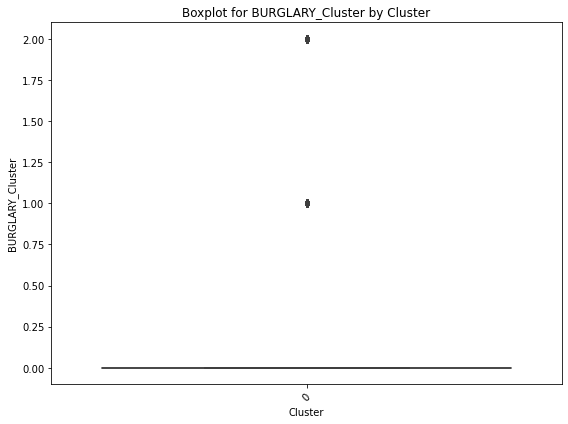

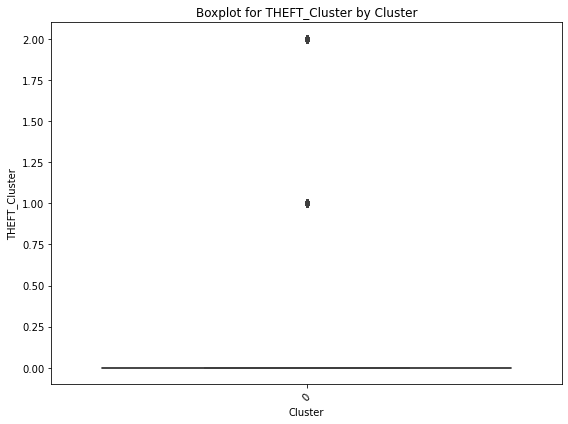

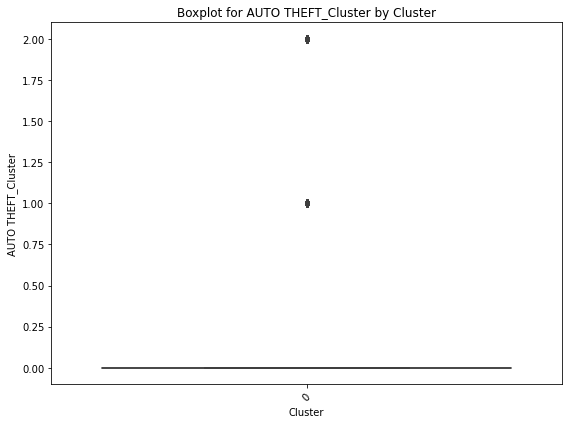

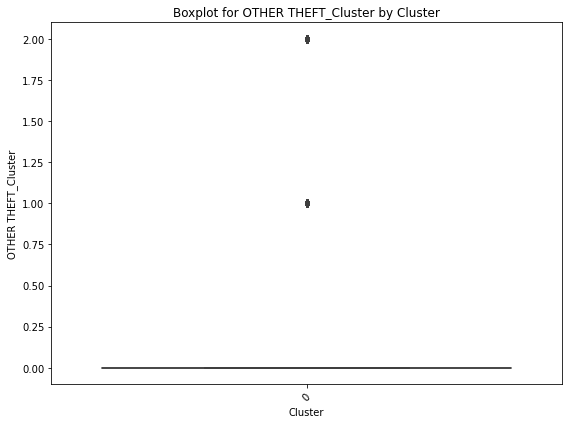

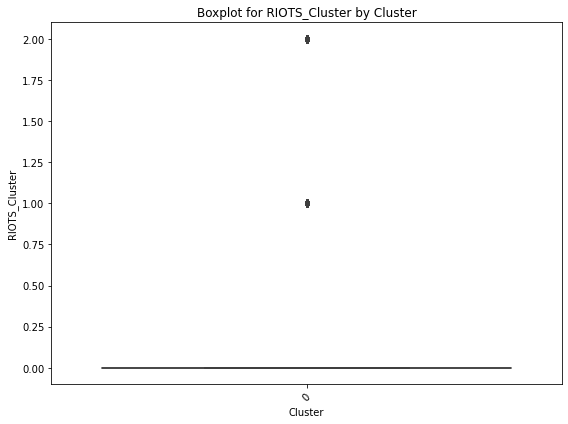

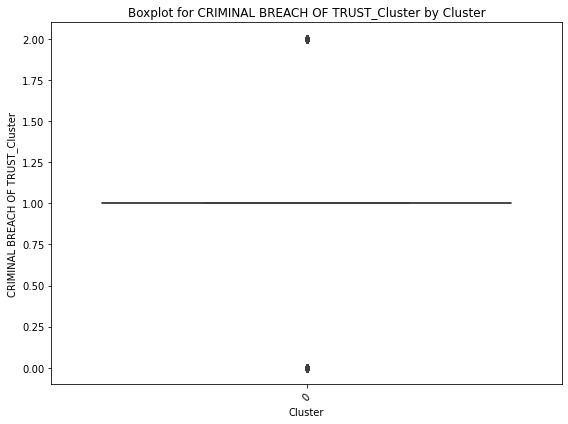

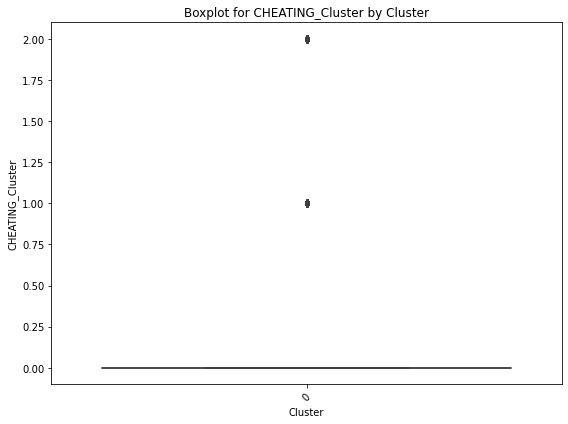

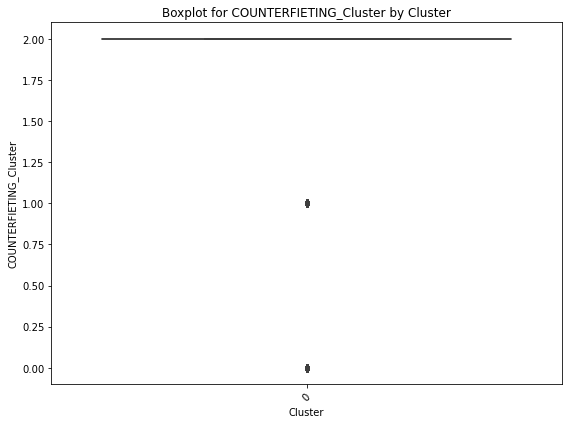

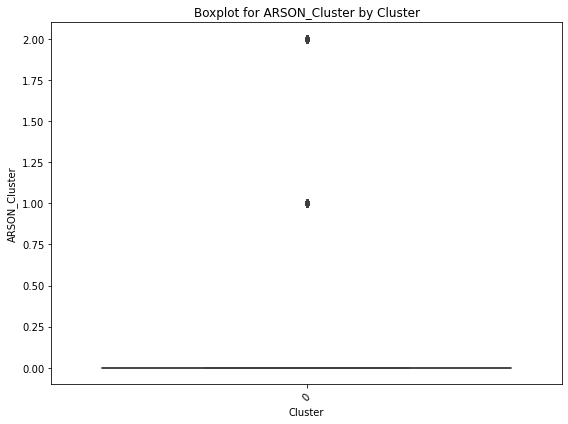

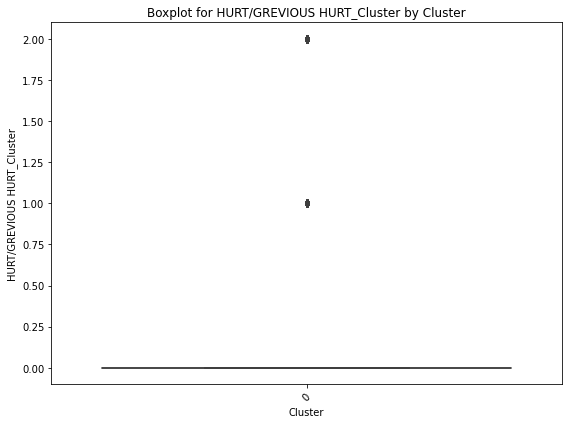

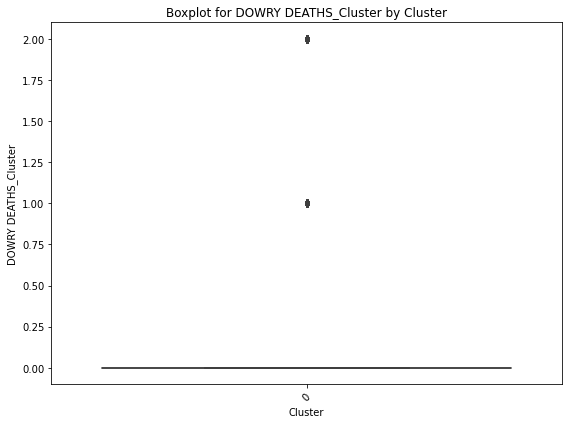

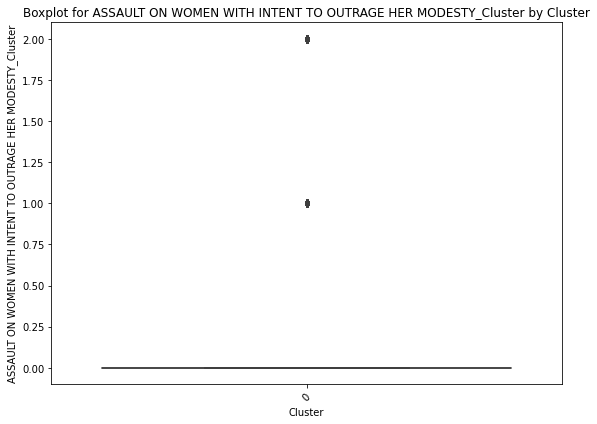

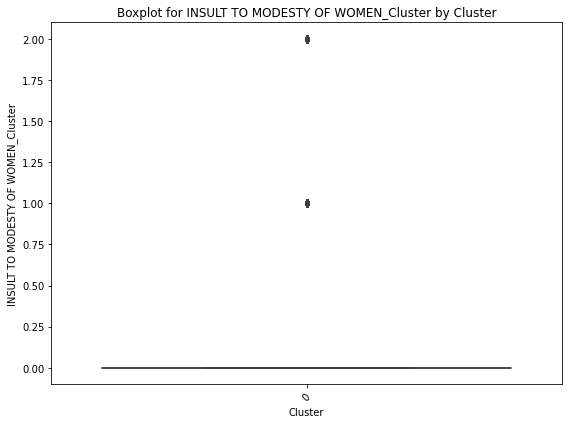

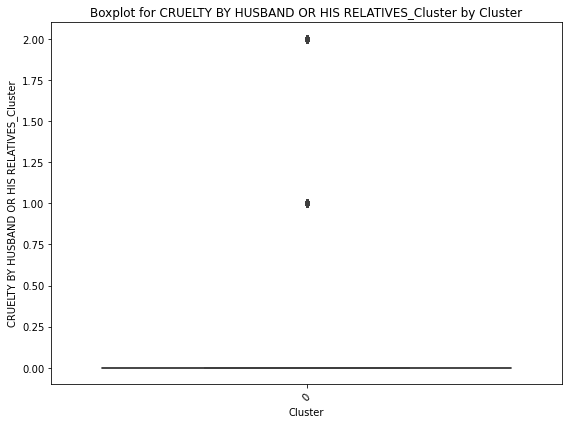

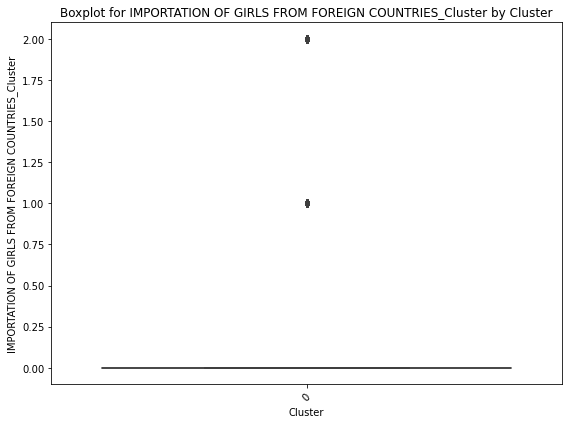

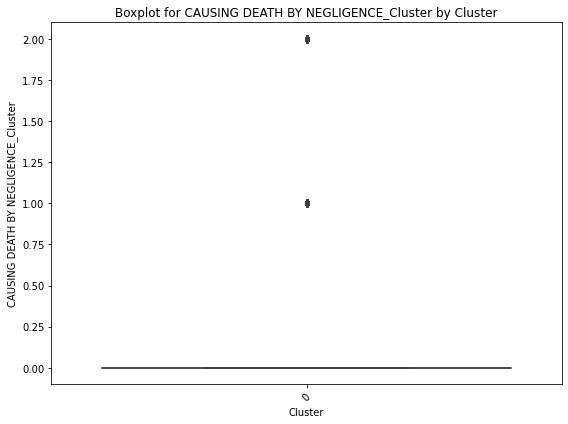

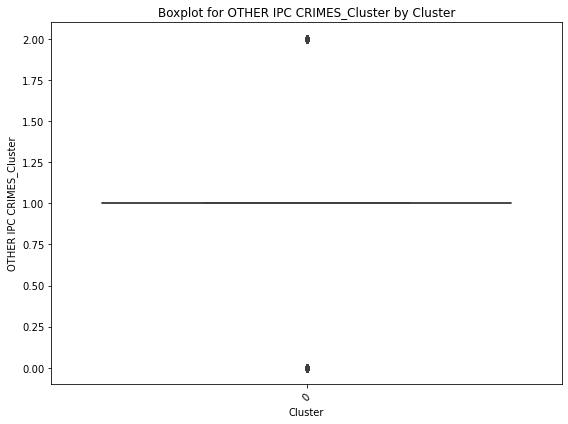

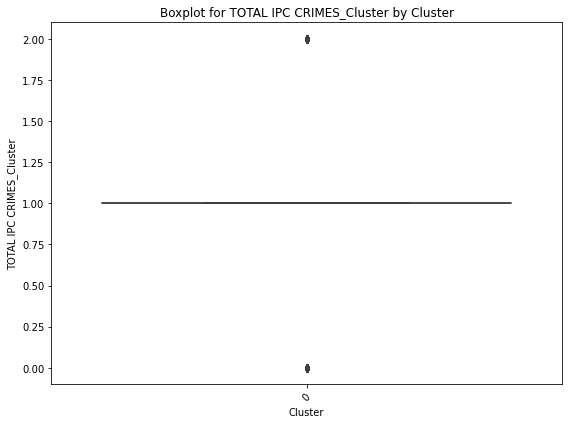

In [30]:
combined_df = pd.concat(cluster_dataframes.values(), ignore_index=True)

combined_df['Cluster_Label'] = combined_df.index // combined_df.shape[0]


cluster_stats = combined_df.groupby('Cluster_Label').describe()

for column in combined_df.columns:
    if column != 'Cluster_Label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Cluster_Label', y=column, data=combined_df)
        plt.title(f'Boxplot for {column} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [31]:
combined_df.fillna(combined_df.median(), inplace=True)
combined_df

Source.Name        STATE/UT  \
0       01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
1       01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
2       01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
3       01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
4       01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
...                                                   ...             ...   
279522  01_District_wise_crimes_committed_IPC_2001_201...     MAHARASHTRA   
279523  01_District_wise_crimes_committed_IPC_2001_201...          ODISHA   
279524  01_District_wise_crimes_committed_IPC_2001_201...          PUNJAB   
279525  01_District_wise_crimes_committed_IPC_2001_201...     WEST BENGAL   
279526  01_District_wise_crimes_committed_IPC_2001_201...        DELHI UT   

              DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0             ADILABAD  2001.0   101.0               60.0   
1            ANANTAPUR  2001.0   151.0              125.0   
2             CHITTOOR  2001.0   101.0               57.0   
3             CUDDAPAH  2001.0    80.0               53.0   
4        EAST GODAVARI  2001.0    82.0               67.0   
...                ...     ...     ...                ...   
279522   MUMBAI COMMR.  2012.0   215.0              170.0   
279523           TOTAL  2012.0  1548.0             1879.0   
279524           TOTAL  2012.0   855.0             1045.0   
279525         KOLKATA  2012.0    85.0              154.0   
279526  DELHI UT TOTAL  2012.0   521.0              439.0   

        CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    RAPE  CUSTODIAL RAPE  \
0                                            17.0    50.0             0.0   
1                                             1.0    23.0             0.0   
2                                             2.0    27.0             0.0   
3                                             1.0    20.0             0.0   
4                                             1.0    23.0             0.0   
...                                           ...     ...             ...   
279522                                        9.0   232.0             0.0   
279523                                       54.0  1458.0             0.0   
279524                                      104.0   680.0             1.0   
279525                                       29.0    68.0             0.0   
279526                                       82.0   706.0             0.0   

        OTHER RAPE  ...  HURT/GREVIOUS HURT_Cluster  DOWRY DEATHS_Cluster  \
0             50.0  ...                           0                     0   
1             23.0  ...                           0                     0   
2             27.0  ...                           0                     0   
3             20.0  ...                           0                     0   
4             23.0  ...                           0                     0   
...            ...  ...                         ...                   ...   
279522       232.0  ...                           0                     0   
279523      1458.0  ...                           1                     2   
279524       679.0  ...                           0                     0   
279525        68.0  ...                           0                     0   
279526       706.0  ...                           0                     0   

        ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY_Cluster  \
0                                                       0             
1                                                       0             
2                                                       0             
3                                                       0             
4                                                       0             
...                                                   ...             
279522                                   

In [32]:
from scipy import stats

z_scores = stats.zscore(combined_df['MURDER'])

threshold = 3
outliers = combined_df['MURDER'][np.abs(z_scores) > threshold]

print(outliers)

28        2602.0
70        1356.0
115       3643.0
169       1226.0
228       1075.0
           ...  
279509    1747.0
279513    1477.0
279516    1368.0
279520    1694.0
279523    1548.0
Name: MURDER, Length: 4836, dtype: float64


In [33]:
numeric_columns = combined_df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_columns))

threshold = 3

outliers = combined_df[(z_scores > threshold).any(axis=1)]

print(outliers)

                                              Source.Name        STATE/UT  \
24      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
28      01_District_wise_crimes_committed_IPC_2001_201...  ANDHRA PRADESH   
70      01_District_wise_crimes_committed_IPC_2001_201...           ASSAM   
77      01_District_wise_crimes_committed_IPC_2001_201...           BIHAR   
102     01_District_wise_crimes_committed_IPC_2001_201...           BIHAR   
...                                                   ...             ...   
279522  01_District_wise_crimes_committed_IPC_2001_201...     MAHARASHTRA   
279523  01_District_wise_crimes_committed_IPC_2001_201...          ODISHA   
279524  01_District_wise_crimes_committed_IPC_2001_201...          PUNJAB   
279525  01_District_wise_crimes_committed_IPC_2001_201...     WEST BENGAL   
279526  01_District_wise_crimes_committed_IPC_2001_201...        DELHI UT   

              DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
24       VISAK

As we can see there no outliers in the clustered data, so we need recheck if there are any missing values present.

In [34]:
missing_values = combined_df.isnull().sum()
print(missing_values)

Source.Name                                            0
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
                                                      ..
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES_Cluster    0
CAUSING DEATH BY NEGLIGENCE_Cluster                    0
OTHER IPC CRIMES_Cluster                               0
TOTAL IPC CRIMES_Cluster                               0
Cluster_Label                                          0
Length: 66, dtype: int64


There are no missing values present in the dataset and all columns are complete.

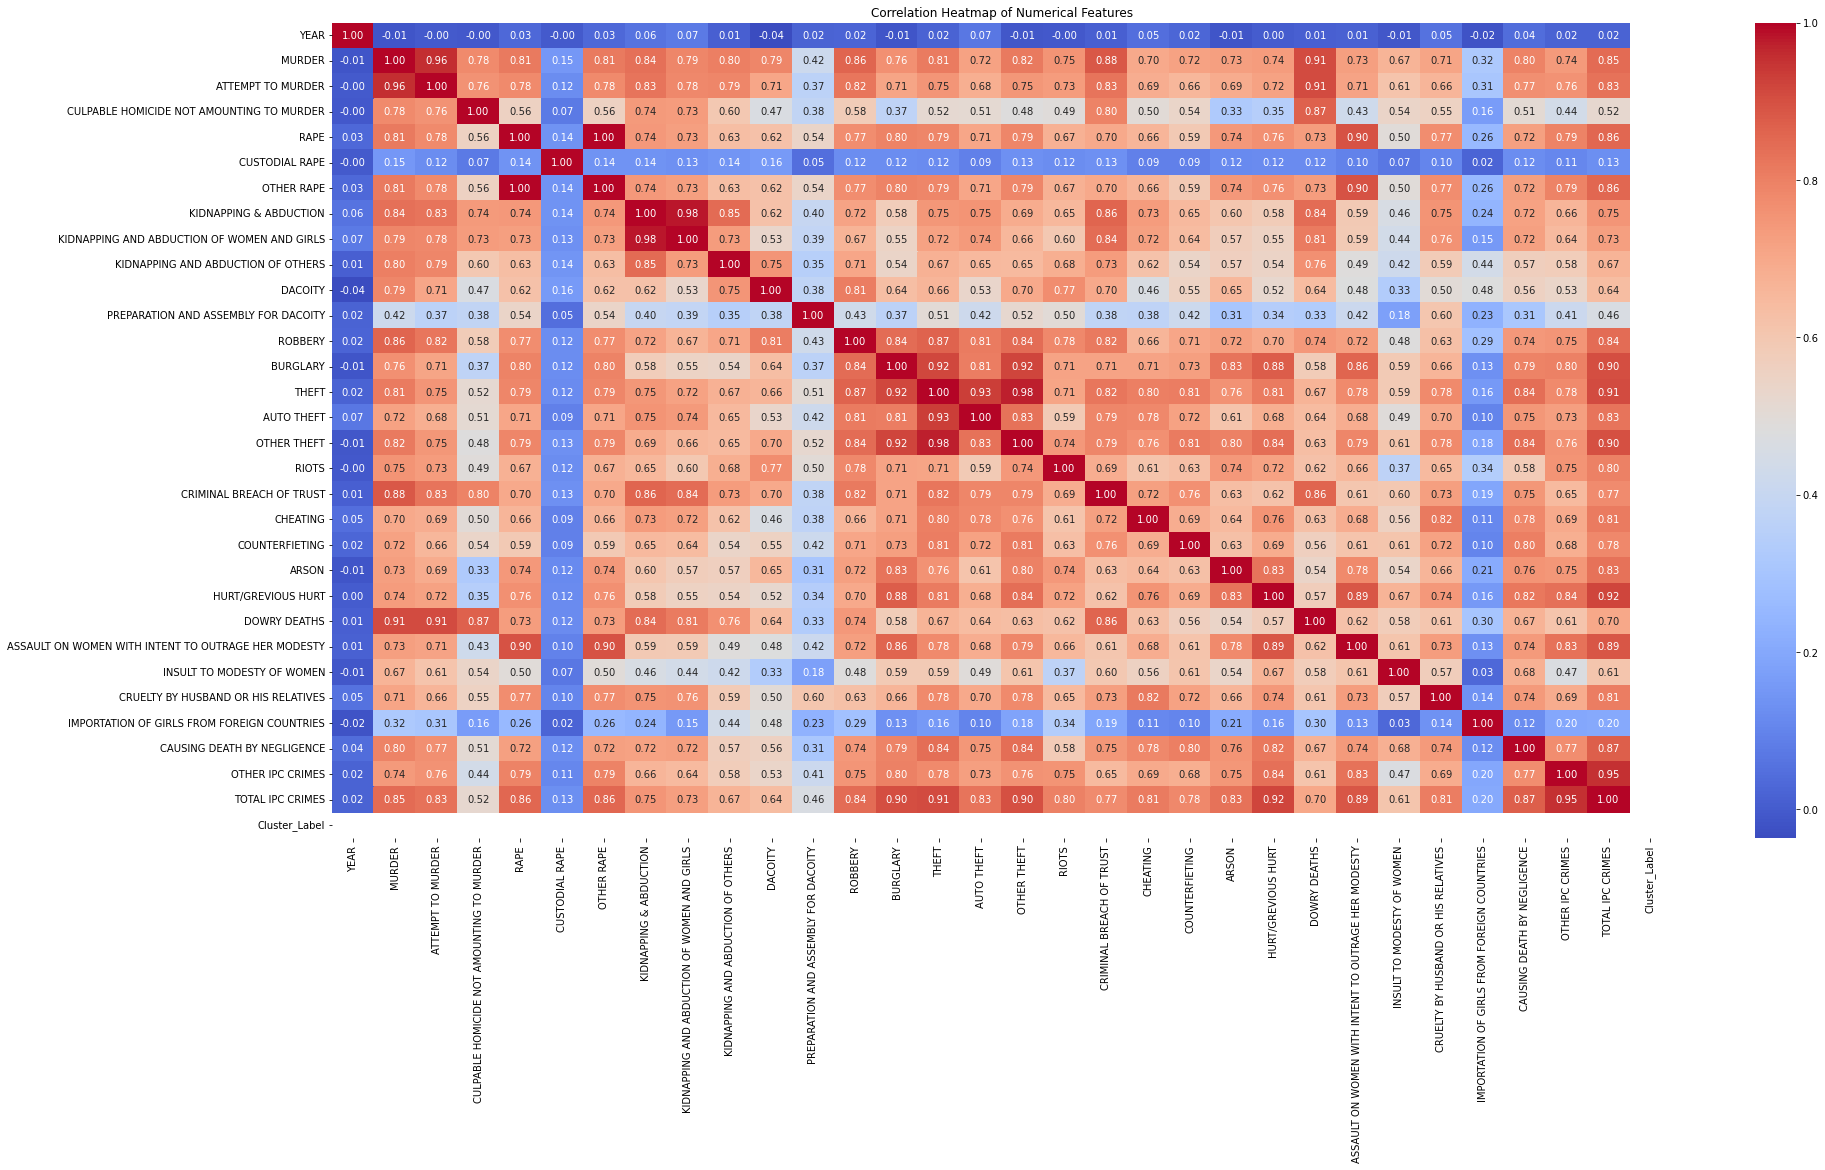

In [35]:
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Feature Importance

In [36]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']

Categorical Columns:
['Source.Name', 'STATE/UT', 'DISTRICT']


In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=10, random_state=42)

feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='Target')

from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X, y)

scores = k_best.scores_
p_values = k_best.pvalues_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-value': p_values})
print(feature_scores)

     Feature       Score       P-value
0  Feature_0  136.925481  2.593510e-20
1  Feature_1    1.163711  2.833453e-01
2  Feature_2  290.677311  4.436733e-31
3  Feature_3    4.177104  4.365670e-02
4  Feature_4    0.137355  7.117249e-01
5  Feature_5    0.149147  7.001891e-01
6  Feature_6    0.709395  4.016955e-01
7  Feature_7    0.290322  5.912359e-01
8  Feature_8    0.357620  5.512104e-01
9  Feature_9    2.845814  9.479298e-02


In [38]:
state_level_data = df.groupby(['STATE/UT', 'YEAR']).sum().reset_index()

literacy_rates = pd.read_excel(r"C:\Users\shash\Downloads\Literarcy rate.xlsx")

literacy_rates.rename(columns={'State': 'STATE/UT'}, inplace=True)

if 'STATE/UT' in state_level_data.columns and 'STATE/UT' in literacy_rates.columns:
    
    merged_data = state_level_data.merge(literacy_rates, on='STATE/UT', how='left')
    
    merged_data.to_csv('merged_data_with_literacy_info.csv', index=False)
else:
    print("'STATE/UT' column not found in one or both DataFrames. Please check column names.")

In [39]:
crime_columns = ['MURDER',
       'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE']

merged_data['Total Crimes'] = merged_data[crime_columns].sum(axis=1)

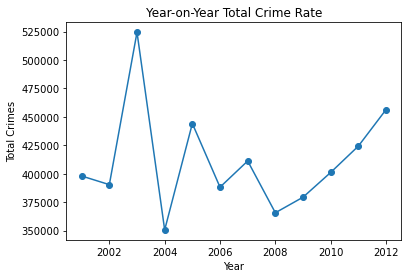

In [40]:
yearly_crime = merged_data.groupby('YEAR')['Total Crimes'].sum()
yearly_crime.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Year-on-Year Total Crime Rate')
plt.show()

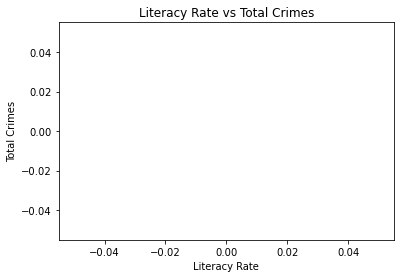

Correlation between Literacy Rate and Total Crimes: nan


In [41]:
plt.scatter(merged_data['Literacy'], merged_data['Total Crimes'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.title('Literacy Rate vs Total Crimes')
plt.show()

correlation = merged_data['Literacy'].corr(merged_data['Total Crimes'])
print(f"Correlation between Literacy Rate and Total Crimes: {correlation}")

<Figure size 1440x1080 with 0 Axes>

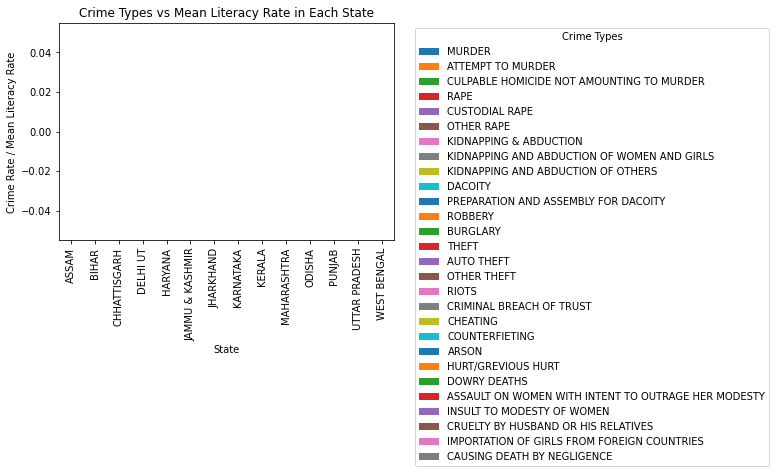

In [42]:
state_wise_mean_literacy = merged_data.groupby('STATE/UT')['Literacy'].mean()
state_wise_crime = merged_data.groupby('STATE/UT')[crime_columns].sum()

plt.figure(figsize=(20, 15))
state_wise_crime.div(state_wise_mean_literacy, axis=0).plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Crime Rate / Mean Literacy Rate')
plt.title('Crime Types vs Mean Literacy Rate in Each State')
plt.legend(title='Crime Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

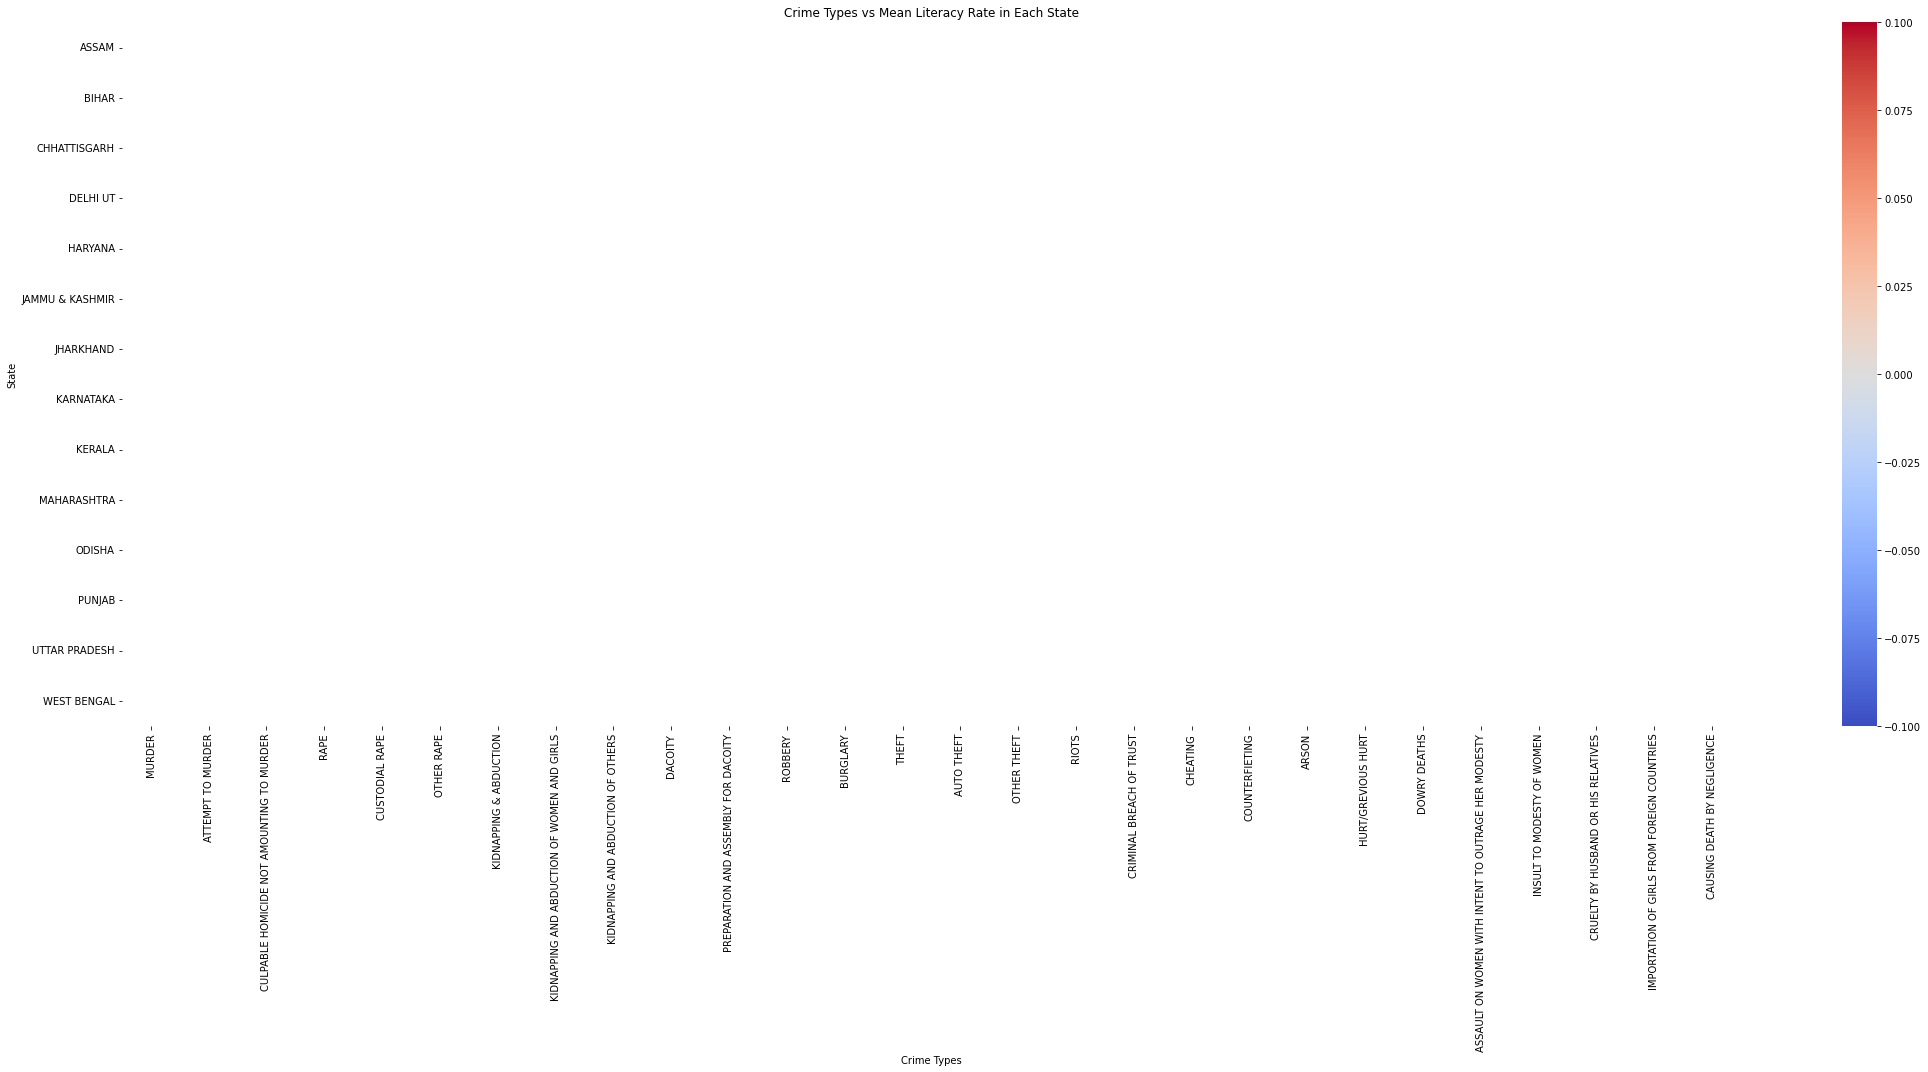

In [43]:
crime_per_literacy = state_wise_crime.div(state_wise_mean_literacy, axis=0)

plt.figure(figsize=(30, 15))
sns.heatmap(crime_per_literacy, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Crime Types')
plt.ylabel('State')
plt.title('Crime Types vs Mean Literacy Rate in Each State')
plt.tight_layout()
plt.show()

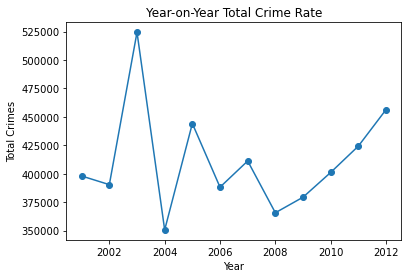

In [44]:
yearly_crime = merged_data.groupby('YEAR')['Total Crimes'].sum()
yearly_crime.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Year-on-Year Total Crime Rate')
plt.show()

In [45]:
X = merged_data['Literacy'].values.reshape(-1, 1)  
Y = merged_data.drop(['Literacy', 'YEAR'], axis=1) 

Y = Y['Total Crimes'].values.reshape(-1, 1) 

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
missing_values_train = np.isnan(X_train).sum(axis=0)
missing_values_test = np.isnan(X_test).sum(axis=0)

print("Missing values in X_train:")
print(missing_values_train[missing_values_train > 0])

print("\nMissing values in X_test:")
print(missing_values_test[missing_values_test > 0])

Missing values in X_train:
[100]

Missing values in X_test:
[26]


In [54]:
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Ensure your data has the correct shape
print(X_train_imputed.shape, X_test_imputed.shape)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train_imputed, Y_train)

# Make predictions
predictions = model.predict(X_test_imputed)

(100, 0) (26, 0)


ValueError: Found array with 0 feature(s) (shape=(100, 0)) while a minimum of 1 is required by LinearRegression.

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_imputed, Y_train)

predictions = model.predict(X_test_imputed)

ValueError: Found array with 0 feature(s) (shape=(100, 0)) while a minimum of 1 is required by LinearRegression.

In [ ]:
predictions

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, predictions)


mse = mean_squared_error(Y_test, predictions)

r2 = r2_score(Y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

NameError: name 'predictions' is not defined

In [ ]:
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
residuals = Y_test - predictions

plt.scatter(Y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
nan_indices_train = np.isnan(X_train).any(axis=1)
nan_indices_test = np.isnan(X_test).any(axis=1)

X_train_clean = X_train[~nan_indices_train]
y_train_clean = Y_train[~nan_indices_train]

X_test_clean = X_test[~nan_indices_test]
y_test_clean = Y_test[~nan_indices_test]

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()


scores = cross_val_score(model, X_train_imputed, Y_train, cv=5)


print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores)}")

Law Enforcement Initiatives:
Community Policing: Strengthening relationships between law enforcement and communities to build trust and encourage cooperation in crime prevention.
Strategic Policing: Using data-driven approaches to identify high-crime areas and allocate resources effectively.
Crime Prevention Programs: Implementing targeted programs aimed at reducing specific crimes like theft, assault, domestic violence, etc.
Technology and Surveillance: Employing technology for better surveillance and crime detection.
Social and Community Engagement:
Education and Awareness: Launching educational programs on crime prevention, safety, and legal consequences.
Youth Programs: Investing in after-school programs, mentorship, and recreational activities to engage youth and prevent delinquency.
Community Support: Encouraging community involvement in neighborhood watch programs, social services, and support for vulnerable populations.
Policy and Legislation:
Policy Reforms: Implementing policies that address root causes of crime such as poverty, unemployment, and inequality.
Legislation Review: Strengthening laws related to crimes, including better penalties for offenders and more support for victims.
Rehabilitation Programs: Focusing on rehabilitating offenders and integrating them back into society.
Economic Development:
Job Creation: Promoting economic opportunities, job training, and employment initiatives to reduce poverty and crime.
Infrastructure Development: Investing in infrastructure, housing, and community development to improve living conditions.
Collaborative Approach:
Partnerships: Encouraging collaboration between law enforcement, government agencies, NGOs, community leaders, and citizens to tackle crime collectively.
Data Sharing: Ensuring effective data sharing between agencies for better crime analysis and resource allocation.
By implementing a combination of these strategies, states can work towards lowering crime rates and creating safer communities. It's essential to continuously evaluate and adapt these strategies based on the evolving nature of crime and societal needs.